# Сегментация клиентов банка

**Заказчик:** 

Менеджер отдела маркетинга 

**Описание проекта:** 

Анализ клиентов регионального банка и сегментация пользователей по количеству потребляемых продуктов, обращая особое внимание на отток.

**Цель проекта:** 

Снизить отток и удержать лояльных клиентов путем сегментации клиентов и предложением им релевантных продуктов.

**Задачи:**

1. Провести исследовательский анализ данных.
2. Сегментировать пользователей на основе данных о количестве потребляемых продуктов и провести сравнительный анализ.
3. Сформулировать и проверить статистические гипотезы.
4. Дать рекомендации на основе исследования данных.

**Описание данных:**

Датасет содержит данные о клиентах банка «Метанпромбанк» за июль 2023 г.
- `user_id` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — приблизительная оценка собственности клиента,
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — был ли клиент активен последнее время,
- `est_salary` — оценочная заработная плата клиента,
- `churn` — уходит или нет.

**Ход исследования:**
1. [Загрузка и изучение данных](#start)
2. [Предобработка данных](#preprocessing)
3. [Исследование данных](#analysis)
4. [Проверка гипотез](#hypothesis)
5. [Сегментация пользователей по числу продуктов](#segmentation)
6. [Итоги](#results)

<a id="start"></a> 
## Загрузка и изучение данных

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import warnings
from scipy import stats as st
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)
pd.set_option("display.float_format", "{:.2f}".format)
# добавим стиль для графиков    
sns.set(style="darkgrid")

In [2]:
! pip install phik==0.10.0
import phik
from phik.report import plot_correlation_matrix
from phik import report

You should consider upgrading via the '/Users/arkadijsyroezko/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [4]:
# Просмотр информации о таблице
display(data.sample(15))
print('*'*110)
data.info()
print('*'*110)
display(data.describe())

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
213,141896,845.00,Ростов,Ж,41.00,0,179615.20,2,0,0,196600.10,0
4973,215683,758.00,Ярославль,М,36.00,3,600485.42,2,1,0,104840.38,0
9531,203019,896.00,Ярославль,М,31.00,0,NaN,1,1,0,163885.09,0
4287,164640,932.00,Рыбинск,М,42.00,0,NaN,2,1,1,234804.90,0
4159,179821,748.00,Рыбинск,Ж,39.00,0,NaN,1,1,0,755691.67,0
9489,162248,766.00,Ярославль,М,37.00,2,855782.35,2,1,0,175730.25,1
1247,228075,932.00,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
305,193951,884.00,Ярославль,Ж,50.00,4,1106692.13,1,1,0,119285.72,0
4191,161907,830.00,Рыбинск,Ж,63.00,3,258275.61,1,0,0,24425.41,0
4710,212876,917.00,Ярославль,М,32.00,0,NaN,1,1,0,63632.21,0


**************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
*****************************************************************************************************

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00,10000.00,9974.00,10000.00,7705.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,171814.71,848.70,42.73,2.63,827794.31,1.87,0.68,0.52,147866.89,0.18
std,33708.24,65.45,12.18,1.98,1980614.15,0.79,0.47,0.50,139388.51,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142810.25,802.00,33.00,0.00,295554.16,1.00,0.00,0.00,75251.90,0.00
50%,172728.00,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119658.10,0.00
75%,201261.75,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174500.54,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


**Вывод:**
- Всего в предоставленных данных 10000 строк и 12 столбцов. 
- Название столбцов необходимо привести к нижнему регистру.
- В столбцах `age` и `balance` присутствуют пропуски. 
- Возрастная категория от 18 до 86 лет. 

<a id="preprocessing"></a> 
## Предобработка данных

### Названия столбцов

In [5]:
# приведем названия столбцов к нижнему регистру
data = data.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'})
# проверим
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


### Тип данных

In [6]:
# переведем user_id в строковый формат 
#data['user_id'] = data['user_id'].astype('str')
# переведем age в целочисленный формат 
#data['age'] = data['age'].astype('Int64')
# проверим
#data['credit_card'] = data['credit_card'].astype('str')
#data['last_activity'] = data['last_activity'].astype('bool')
#data['churn'] = data['churn'].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


### Обработка пропусков

In [7]:
# посмотрим на процент пропущенных значений в столбцах
print(round(data.isna().sum()/len(data)*100,1))

user_id          0.00
score            0.00
city             0.00
gender           0.00
age              0.30
equity           0.00
balance         23.00
products         0.00
credit_card      0.00
last_activity    0.00
est_salary       0.00
churn            0.00
dtype: float64


- В столбце `age` немного пропусков - удалим.

- В столбце `balance` много пропусков.
Можем предположить, что пропущенные значения это - нулевой баланс, баланс ушедших клиентов или у клента есть крединая картой, так же можем предположить, что это техническая ошибка.

Пока не выявлена природа пропусков.

In [8]:
# удалим пропуски в age
data = data.dropna(subset=['age']).reset_index(drop=True)

**Исследуем пропуски в `balance`**

In [9]:
# Вызовем метод describe и проанализируем часть датасета, содержащую пропуски:
display(data[data['balance'].isna()].describe())
print('*'*110)
# Сравним с результатом вызова метода describe для датасета без пропуска:
display((data.dropna(subset=['balance']).reset_index(drop=True)).describe())

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2279.00,2279.00,2279.00,2279.00,0.00,2279.00,2279.00,2279.00,2279.00,2279.00
mean,171904.89,865.36,42.09,0.05,NaN,1.16,0.82,0.55,226345.42,0.01
std,33303.22,89.55,11.94,0.23,NaN,0.40,0.39,0.50,199825.59,0.08
min,114182.00,642.00,18.00,0.00,NaN,0.00,0.00,0.00,20274.03,0.00
25%,142992.50,871.00,33.00,0.00,NaN,1.00,1.00,0.00,120217.39,0.00
50%,172304.00,903.00,40.00,0.00,NaN,1.00,1.00,1.00,174347.87,0.00
75%,201257.00,922.00,49.00,0.00,NaN,1.00,1.00,1.00,240372.78,0.00
max,229145.00,990.00,86.00,3.00,NaN,3.00,1.00,1.00,1333687.36,1.00


**************************************************************************************************************


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,7695.00,7695.00,7695.00,7695.00,7695.00,7695.00,7695.00,7695.00,7695.00,7695.00
mean,171710.89,843.74,42.92,3.39,827245.59,2.08,0.64,0.52,124520.39,0.23
std,33812.86,55.34,12.24,1.58,1980327.41,0.76,0.48,0.50,104667.11,0.42
min,94561.00,689.00,18.00,0.00,0.00,1.00,0.00,0.00,2546.30,0.00
25%,142638.00,801.00,33.00,2.00,295698.71,2.00,0.00,0.00,67556.98,0.00
50%,172710.00,840.00,40.00,4.00,524295.33,2.00,1.00,1.00,106250.18,0.00
75%,201145.50,882.00,52.00,5.00,980051.21,2.00,1.00,1.00,155144.60,0.00
max,229136.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


Анализ позволяет сделать следующие выводы о пользователях, в записях о которых содержится пропуск:

- у клиентов чуть выше скоринговый бал;
- клиенты имеют более низкие оценки собственности;
- они пользуются чуть меньшим числом продуктов;
- у них чуть более выше ЗП (средние и медиана);
- кредитной картой клиенты с пропущенным балансом пользуются чаще.

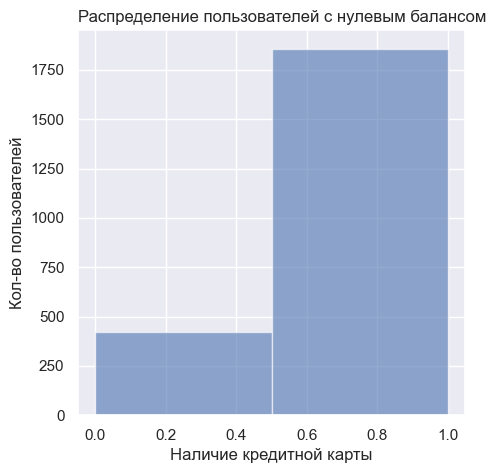

In [10]:
# посмотрим сколько клиентов с нулевым балансом и кредитной картой
#sns.set(style="darkgrid")
plt.title('Распределение пользователей с нулевым балансом', loc='left')
data[(data['balance'].isna())]['credit_card'].hist(bins=2, figsize=(5, 5), alpha=0.6)
plt.ylabel('Кол-во пользователей')
plt.xlabel('Наличие кредитной карты')
plt.show()

Возможно, у многих пользователей кредитная карта и баланс содержит нулевой кредитный счет.

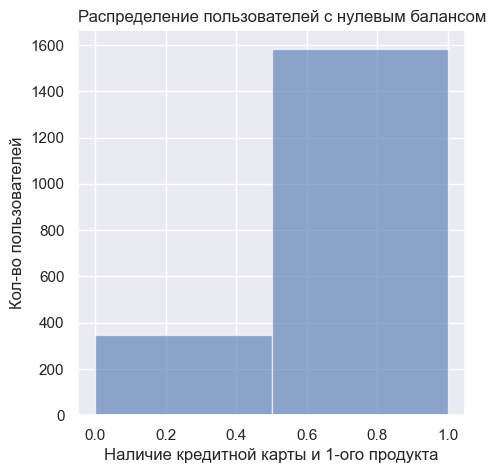

In [11]:
# посмотрим сколько клиентов с нулевым балансом, одним продуктом и кредитной картой
plt.title('Распределение пользователей с нулевым балансом', loc='left')
data[(data['balance'].isna()) & (data['products'] == 1)]['credit_card'].hist(bins=2, figsize=(5, 5), alpha=0.6)
plt.ylabel('Кол-во пользователей')
plt.xlabel('Наличие кредитной карты и 1-ого продукта')
plt.show()

Клиентов, имеющих пропуск в балансе и имеющих всего 1 продукт - кредитную карту, 1600 человек.

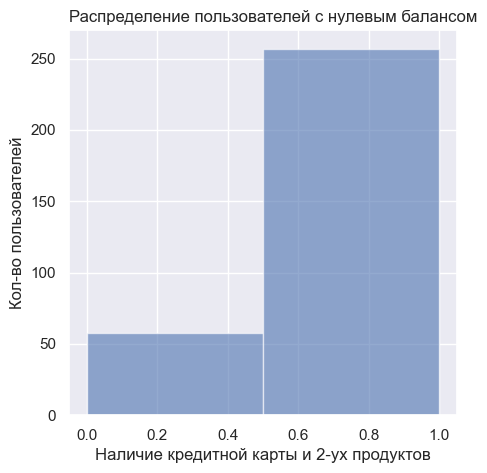

In [12]:
# посмотрим сколько клиентов с нулевым балансом, двумя продуктами и кредитной картой
plt.title('Распределение пользователей с нулевым балансом', loc='left')
data[(data['balance'].isna()) & (data['products'] == 2)]['credit_card'].hist(bins=2, figsize=(5, 5), alpha=0.6)
plt.ylabel('Кол-во пользователей')
plt.xlabel('Наличие кредитной карты и 2-ух продуктов')
plt.show()

Есть клиенты (около 250) с нулевым балансом и наличием двух банковских продукта.

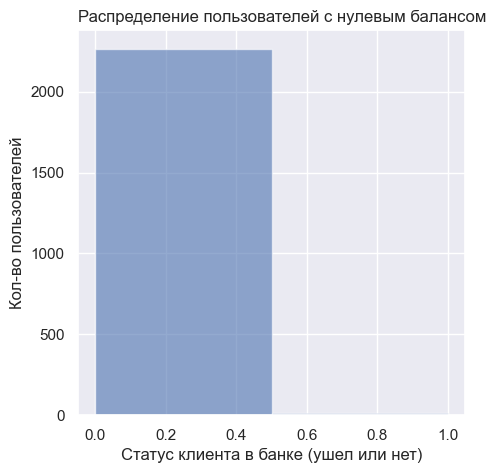

In [13]:
# посмотрим сколько клиентов с нулевым балансом, которые ушли
plt.title('Распределение пользователей с нулевым балансом', loc='left')
data[(data['balance'].isna())]['churn'].hist(bins=2, figsize=(5, 5), alpha=0.6)
plt.ylabel('Кол-во пользователей')
plt.xlabel('Статус клиента в банке (ушел или нет)')
plt.show()

In [14]:
def status(row):
    if (row['balance'] >= 0): #or (row['balance'] >= 10000000):
        return 'баланс заполнен'
    else:
        return 'баланс пропущен'
data['status_balance'] = data.apply(status, axis=1)

In [15]:
# посмотрим сколько клиентов с кредитной картой с пропущеным балансом
# plt.title('Распределение пользователей с кредитной картой по статусу баланса', loc='left')
# data[(data['credit_card'] == 1)]['status_balance'].hist(bins=2, figsize=(5, 5), alpha=0.6)
# plt.ylabel('Кол-во пользователей с кред.картой')
# plt.xlabel('Статус баланса')
# plt.show()

**Как мы видим:**

Клиенты, имеющие пропуск в балансе, в большинстве все еще клиенты банка. Значит мы не можем утверждать, что если клиент ушел, то его баланс становится нулевым значением.
Так же мы не можем утверждать, что нулевой баланс - это наличие кредитной карты.

Таким образом, природа пропусков не выявлена. Заменять значения или удалять нельзя.

### Обработка дубликатов

In [16]:
# проверим на наличие явных дубликатов
data.duplicated().sum()

0

In [17]:
# проверим user_id на наличие явных дубликатов
data['user_id'].duplicated().sum()

50

Явных дубликатов нет, но по айди пользователя 50 дубликата.
ID - это уникальный код клиента и по ID мы считаем кол-во пользователей данного датасета.

In [18]:
# удалим дубликаты
data = data.drop_duplicates(subset=['user_id'], keep='first')

In [19]:
# проверим
data['user_id'].duplicated().sum()

0

### Аномалии

In [20]:
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9924.00,9924.00,9924.00,9924.00,7664.00,9924.00,9924.00,9924.00,9924.00,9924.00
mean,171737.16,848.73,42.73,2.63,828206.27,1.87,0.68,0.52,147880.18,0.18
std,33697.42,65.40,12.18,1.98,1984121.61,0.79,0.47,0.50,139358.30,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142725.00,802.00,33.00,0.00,295526.57,1.00,0.00,0.00,75252.18,0.00
50%,172643.00,853.00,40.00,3.00,524927.74,2.00,1.00,1.00,119715.39,0.00
75%,201159.25,900.00,51.00,4.00,980753.67,2.00,1.00,1.00,174666.93,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


В целом медиана от средней не очень отличается, кроме `age`, `balance` и `est_salary`.

count   9924.00
mean      42.73
std       12.18
min       18.00
25%       33.00
50%       40.00
75%       51.00
max       86.00
Name: age, dtype: float64

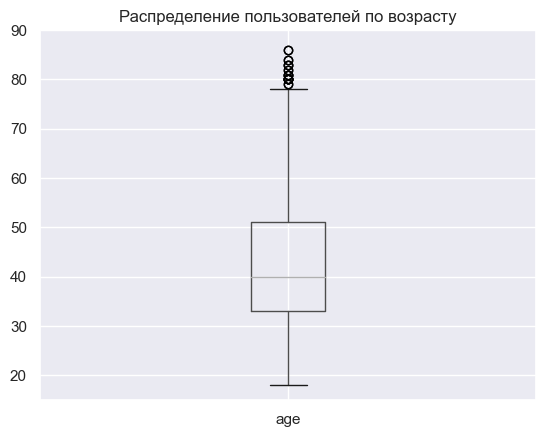

In [21]:
# посмотрим возраст, баланс и оценочную ЗП на диаграмме размаха.
plt.title('Распределение пользователей по возрасту')
plt.ylim(15, 90)
data.boxplot('age')
data['age'].describe()

In [22]:
# посмотрим процент клиентов старше 78 лет
print('Количество клиентов старше 78 лет:', len(data.query('age > 78')))
print('Процент от общего числа:', round(len(data.query('age > 78'))/len(data)*100, 2))

Количество клиентов старше 78 лет: 22
Процент от общего числа: 0.22


count        7664.00
mean       828206.27
std       1984121.61
min             0.00
25%        295526.57
50%        524927.74
75%        980753.67
max     119113552.01
Name: balance, dtype: float64

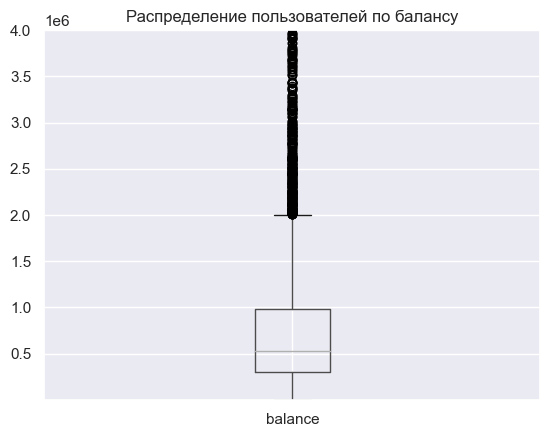

In [23]:
plt.title('Распределение пользователей по балансу')
plt.ylim(1, 4000000)
data.boxplot('balance')
data['balance'].describe()

In [24]:
# посмотрим процент клиентов у которых баланс больше 2 млн
print('Количество клиентов с балансом выше 2 млн:', len(data.query('balance > 2000000')))
print('Процент от общего числа:',len(data.query('balance > 2000000'))/len(data)*100)

Количество клиентов с балансом выше 2 млн: 427
Процент от общего числа: 4.302700523982265


count      9924.00
mean     147880.18
std      139358.30
min        2546.30
25%       75252.18
50%      119715.39
75%      174666.93
max     1395064.45
Name: est_salary, dtype: float64

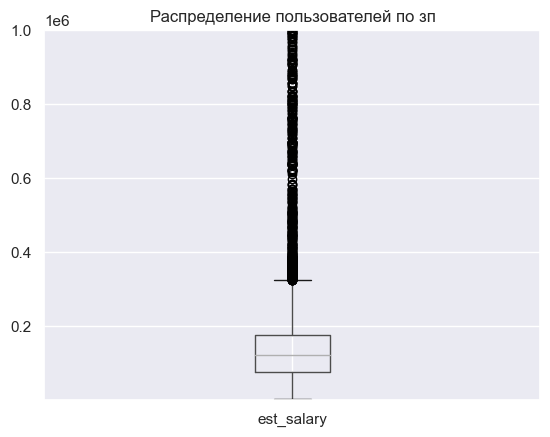

In [25]:
plt.title('Распределение пользователей по зп')
plt.ylim(1, 1000000)
data.boxplot('est_salary')
data['est_salary'].describe()

In [26]:
# посмотрим процент клиентов у которых оценочная ЗП больше 320 тыс
print('Количество клиентов с оценочной ЗП выше 320 тыс:', len(data.query('est_salary > 320000')))
print('Процент от общего числа:',len(data.query('est_salary > 320000'))/len(data)*100)

Количество клиентов с оценочной ЗП выше 320 тыс: 491
Процент от общего числа: 4.9476017734784365


- Максимальный возраст - 78 лет. В "выброс" попали всего 22 человека. Оставим, клиенты такого возраста могут быть.
- Баланс может быть больше двух миллионов, так же и ЗП может быть 1,5 млн.

Выбросов не так много, но в дальнейшем **выделим VIP клиентов для отдельного исследования**.

Рассмотрим отдельно столбец `products`

In [27]:
data['products'].describe()

count   9924.00
mean       1.87
std        0.79
min        0.00
25%        1.00
50%        2.00
75%        2.00
max        5.00
Name: products, dtype: float64

Минимальное значение - 0. Если человек является клиентом банка, он должен пользоваться хотя бы 1 продуктом. Посмотрим, что это за клиент.

In [28]:
data[data['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,status_balance
8939,147837,962.00,Рыбинск,Ж,79.00,3,NaN,0,0,0,25063.96,1,баланс пропущен


Такой клиент всего 1, и он ушел из банка - удалим.

In [29]:
# удалим строку:
data = data[data['products']!=0]
# проверим
data['products'].describe()

count   9923.00
mean       1.87
std        0.79
min        1.00
25%        1.00
50%        2.00
75%        2.00
max        5.00
Name: products, dtype: float64

**Вывод:**
- все строковые данные были переведены в нижний регистр;
- тип данных осмотрен;
- дубликаты обработаны;
- восстановить пропуски на данный момент нет возможности, как и нет причины;
- аномалии изучены

**Данные подготовлены для дальнейшего анализа.**

<a id="analysis"></a> 
## Исследование данных

- сравнение портретов типичных клиентов (сердние и медианы)
- уровни оттока по категориям
- коррялиционный анализ (по городам в т.ч.)
- распределения непрерывных, в т.ч. в разрезе оттока

### Изучение портрета клиента

Построим диаграммы по категориальному признаку (город, пол, наличие кред.карты, активности клиента и ушёл или нет).

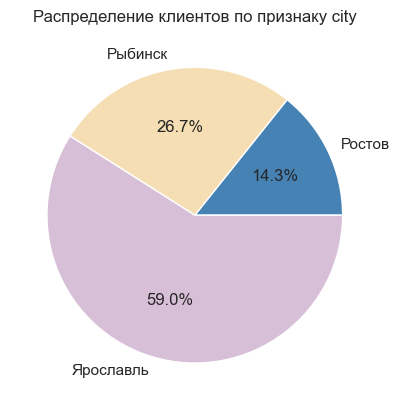

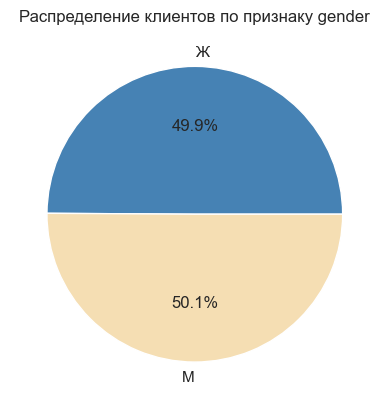

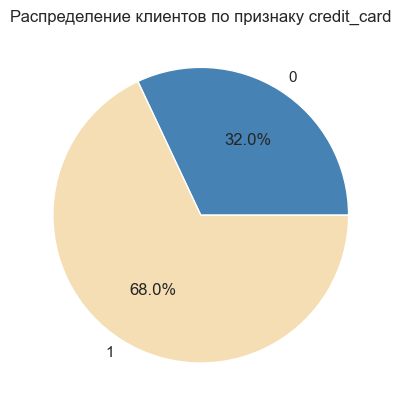

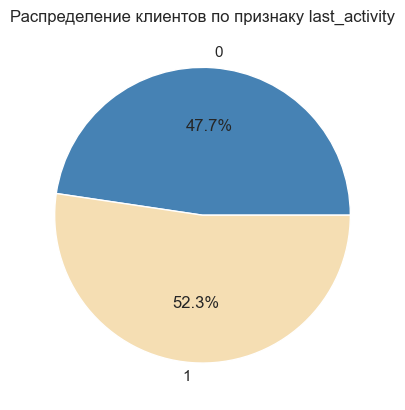

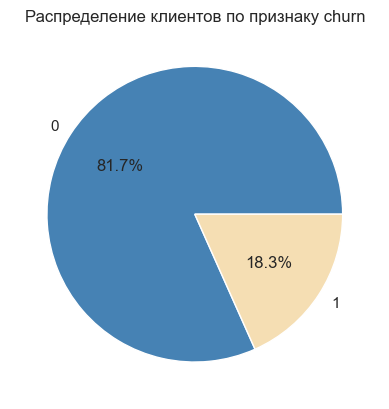

In [30]:
colours = [ 'steelblue', 'wheat', 'thistle']
for column in ['city','gender','credit_card','last_activity','churn']:
    df = data.groupby(column).agg({'user_id': 'count'})
    fig1,ax1 = plt.subplots()
    ax1.pie(df['user_id'], labels=df.index, autopct='%1.1f%%', colors=colours)
    ax1.set_title(f'Распределение клиентов по признаку {column}')
    colors=colours
    plt.show()

- Ожидаемо, больше всего клиентов в Ярославле - около 60%; 
- Количество клиентов женского и мужского пола почти одинаковое;
- Клиентов с кредитной картой 68%;
- Активных клиентов и неактивных - примерно одинаковое количество;
- Ушло около 18% клиентов;

Построим гистограммы

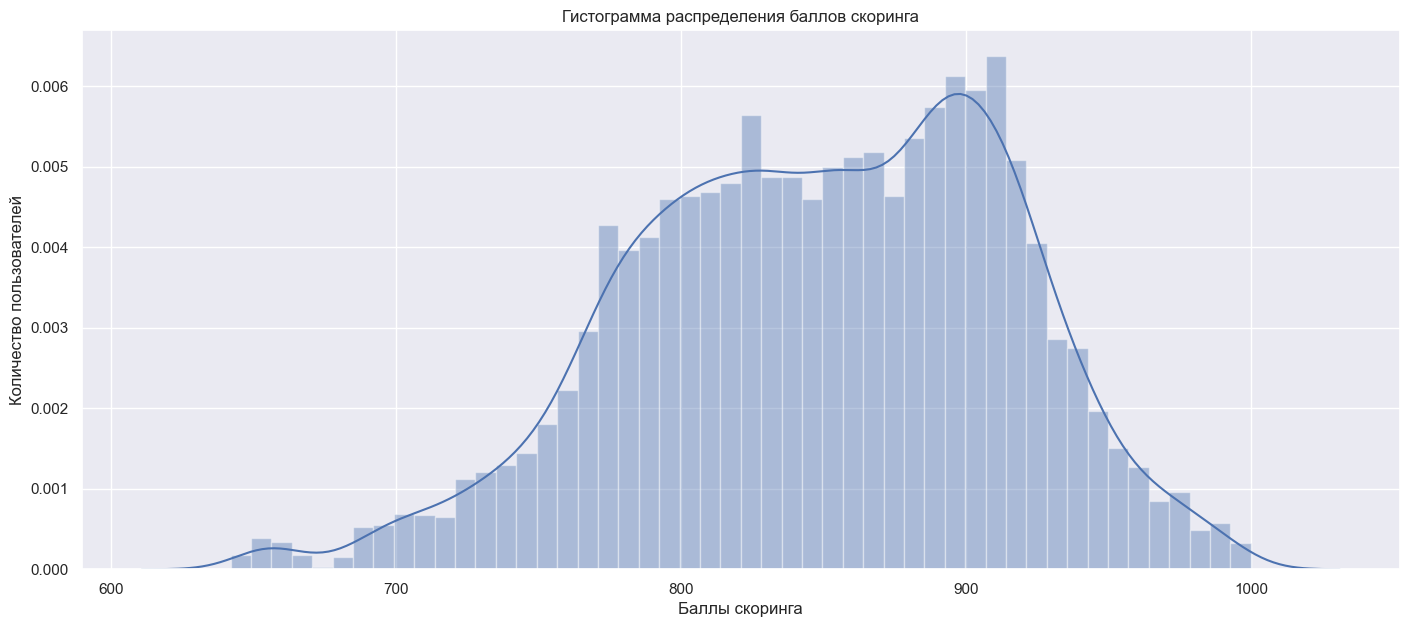

count   9923.00
mean     848.72
std       65.39
min      642.00
25%      802.00
50%      853.00
75%      900.00
max     1000.00
Name: score, dtype: float64

In [31]:
plt.figure(figsize=(17,7))
sns.distplot(data['score'], bins=50)
plt.ylabel('Количество пользователей')
plt.xlabel('Баллы скоринга')
plt.title('Гистограмма распределения баллов скоринга')
plt.show()

data['score'].describe()

- Баллы скоринга распределены равномерно. 
- В основном у клиентов от 750 до 950 баллов.

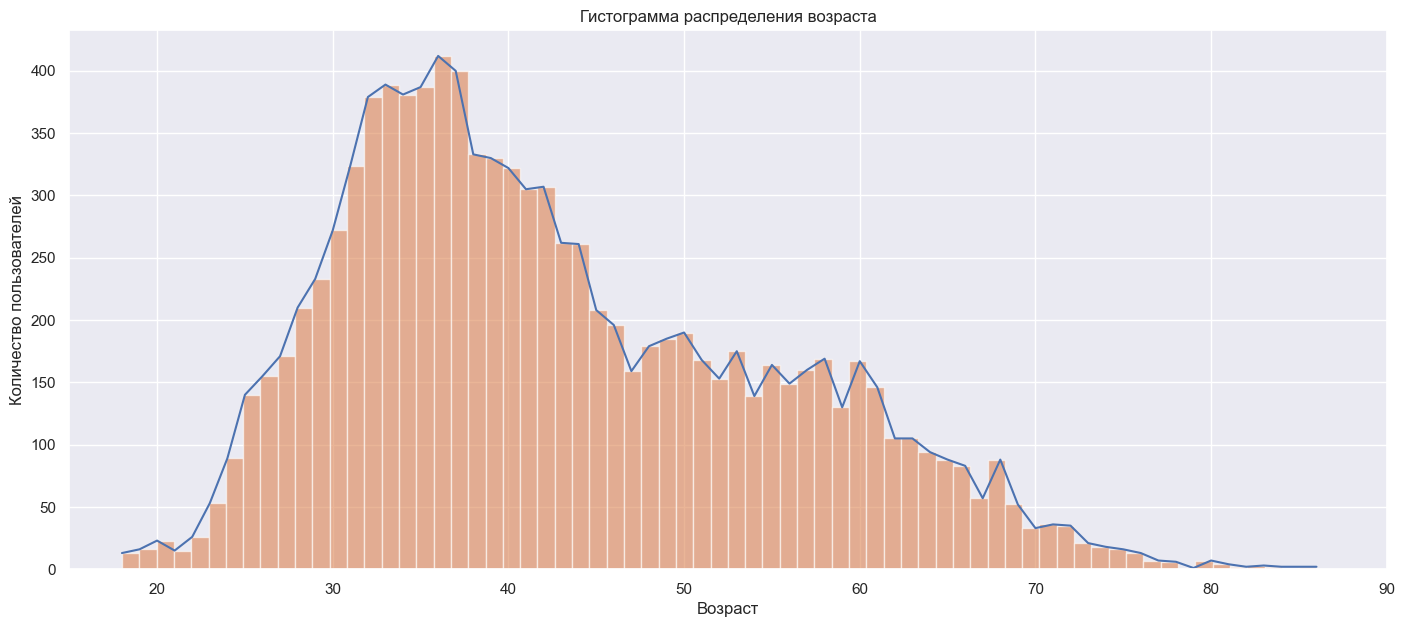

In [32]:
plt.figure(figsize=(12,5))
plt.plot(data.groupby('age')['user_id'].count(), label='Релизы')
data['age'].hist(bins=69, figsize=(17,7), alpha=0.6)
plt.title('Гистограмма распределения возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.xlim(15,90)
plt.show()

- Больше всего клиентов в возрасте от 27 до 47

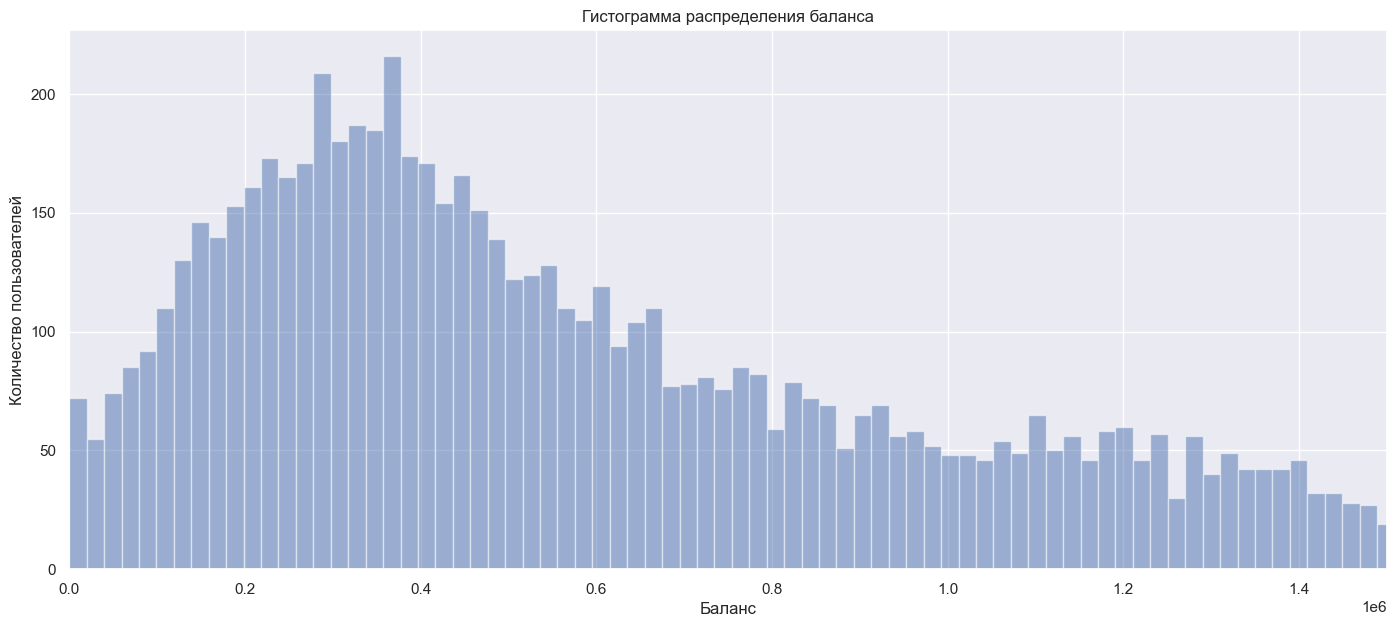

count        7664.00
mean       828206.27
std       1984121.61
min             0.00
25%        295526.57
50%        524927.74
75%        980753.67
max     119113552.01
Name: balance, dtype: float64

In [33]:
plt.figure(figsize=(20, 7))
data['balance'].hist(bins=6000, figsize=(17,7), alpha=0.5)
plt.title('Гистограмма распределения баланса')
plt.xlabel('Баланс')
plt.ylabel('Количество пользователей')
plt.xlim(0,1500000)
plt.show()

data['balance'].describe()

- Пик баланса приходится на сумму 380 т.р.

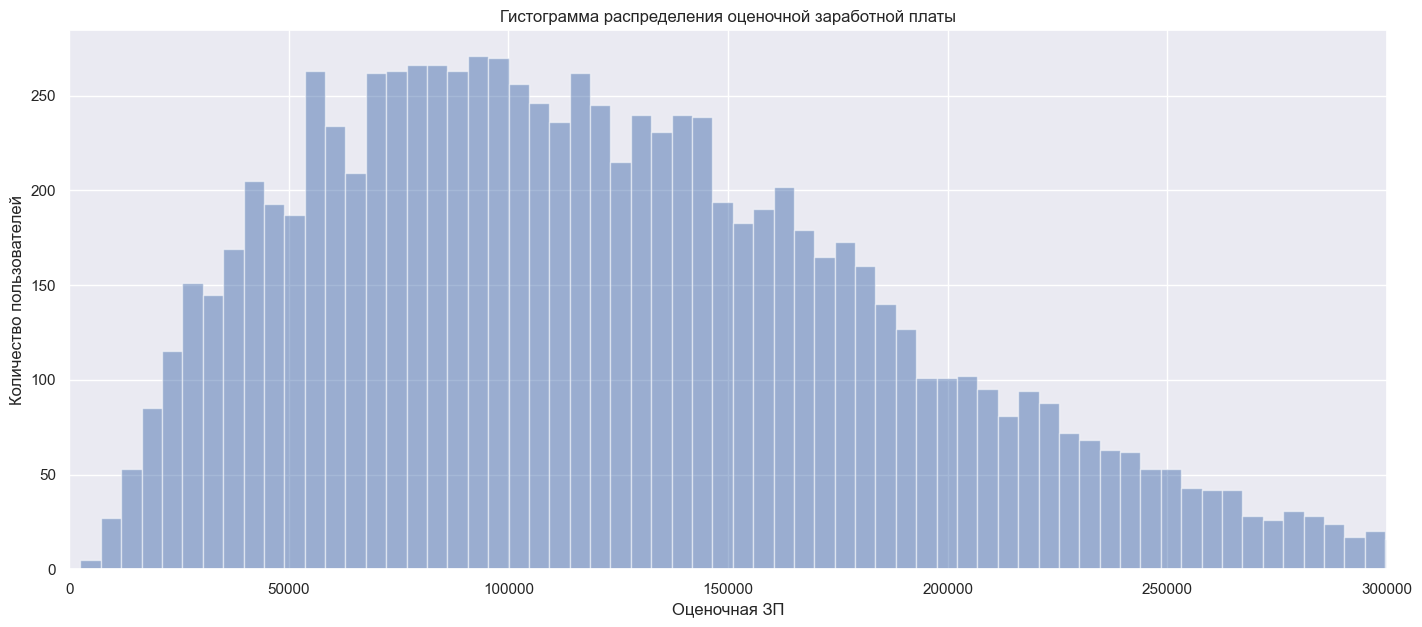

count      9923.00
mean     147892.55
std      139359.86
min        2546.30
25%       75255.86
50%      119719.33
75%      174673.28
max     1395064.45
Name: est_salary, dtype: float64

In [34]:
plt.figure(figsize=(20, 7))
data['est_salary'].hist(bins=300, figsize=(17,7), alpha=0.5)
plt.title('Гистограмма распределения оценочной заработной платы')
plt.xlabel('Оценочная ЗП')
plt.ylabel('Количество пользователей')
plt.xlim(0,300000)
plt.show()

data['est_salary'].describe()

- Больше всего клиентов получают ЗП от 40 тыс до 200 тыс.

- Больше всего клиентов в возрасте от 27 до 47;
- В основном оценка собственности клиента - 0, далее 5 и 4;
- БОльшая часть клиентов пользуются либо двумя, либо одним продуктом банка.

**Из представленных графиков можно сказать следующее:**
- большая часть клиентов банка обслуживаются в г.Ярославль, почти 60%. 
- среди клиентов мужчин и женщин одинаковое кол-во. 
- Кредитная карта есть у 68% клиентов. 
- Активными в банке считают 52% от общего числа клиентов. 
- Отток клиентов из банка составляет 18%. 
- Большинство клиентов имеют кредитный рейтинг от 750 до 950.
- Больше всего клиентов в возрасте от 27 до 47.
- Пик баланса приходится на сумму 380 т.р. 
- Больше всего клиентов получают ЗП от 40 тыс до 200 тыс.
- В основном оценка собственности клиента - 0, далее 5 и 4. 
- БОльшая часть клиентов пользуются либо одним, либо двумя продуктами банка.

### VIP клиенты

Выделим VIP клиентов в отдельный датасет. 
Предположим, что для статуса VIP на счету д.б. не менее 2 млн.руб. или оценочная ЗП не менее 320 тыс (вспомним выбросы).

In [36]:
def status(row):
    if (row['balance'] >= 2000000) or (row['est_salary'] >= 320000): #or (row['balance'] >= 10000000):
        return 'VIP'
    else:
        return 'normal'
data['status'] = data.apply(status, axis=1)

In [37]:
VIP = data.loc[(data['status'] == 'VIP')]
VIP.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,796.00,796.00,796.00,796.00,492.00,796.00,796.00,796.00,796.00,796.00
mean,172506.07,895.61,43.82,2.64,3993455.45,1.94,0.62,0.54,459070.59,0.30
std,34631.13,73.89,11.16,2.23,6930092.67,0.95,0.49,0.50,301405.18,0.46
min,96562.00,686.00,23.00,0.00,66103.84,1.00,0.00,0.00,21765.76,0.00
25%,144653.50,884.75,35.00,0.00,2168112.55,1.00,0.00,0.00,222906.33,0.00
50%,171819.00,919.00,41.00,3.00,2718650.00,2.00,1.00,1.00,354328.83,0.00
75%,201575.50,942.00,52.00,5.00,3831707.45,2.00,1.00,1.00,663782.48,1.00
max,229058.00,1000.00,80.00,8.00,119113552.01,4.00,1.00,1.00,1395064.45,1.00


In [38]:
normal = data.loc[(data['status'] == 'normal')]
normal.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9127.00,9127.00,9127.00,9127.00,7172.00,9127.00,9127.00,9127.00,9127.00,9127.00
mean,171672.72,844.63,42.63,2.63,611069.82,1.87,0.69,0.52,120753.55,0.17
std,33616.79,62.97,12.25,1.96,428872.40,0.78,0.46,0.50,63393.22,0.38
min,94561.00,642.00,18.00,0.00,0.00,1.00,0.00,0.00,2546.30,0.00
25%,142548.00,800.00,33.00,1.00,285708.94,1.00,0.00,0.00,71932.71,0.00
50%,172704.00,848.00,40.00,3.00,487191.35,2.00,1.00,1.00,112937.18,0.00
75%,201131.00,894.00,51.00,4.00,866623.51,2.00,1.00,1.00,161571.27,0.00
max,229145.00,999.00,86.00,9.00,1999799.18,5.00,1.00,1.00,319714.04,1.00


Теперь у нас два датасета для исследования.

### Отток клиентов

**Исследование обычных клиентов.**

Посмотрим на средние значения обычных пользователей в двух группах — тех, кто ушел в отток (1) и тех, кто остался (0).

In [39]:
normal.groupby('churn').agg('mean').T

churn,0,1
user_id,171961.64,170292.65
score,842.36,855.49
age,42.92,41.22
equity,2.41,3.69
balance,568786.55,761697.27
products,1.77,2.33
credit_card,0.71,0.57
last_activity,0.48,0.70
est_salary,120534.26,121801.01


- у тех, кто остался, equity ниже;
- средний баланс выше у тех, кто ушёл;
- кол-во продуктов больше у ушедших клиентов;
- активность ушедших клиентов была выше;

В остальном, отличия небольшие.

In [40]:
print('Количество ушедших клиентов:', len(normal.query('churn == 1')))
print('Процент от общего числа:',len(data.query('churn == 1'))/len(data)*100)

Количество ушедших клиентов: 1580
Процент от общего числа: 18.32107225637408


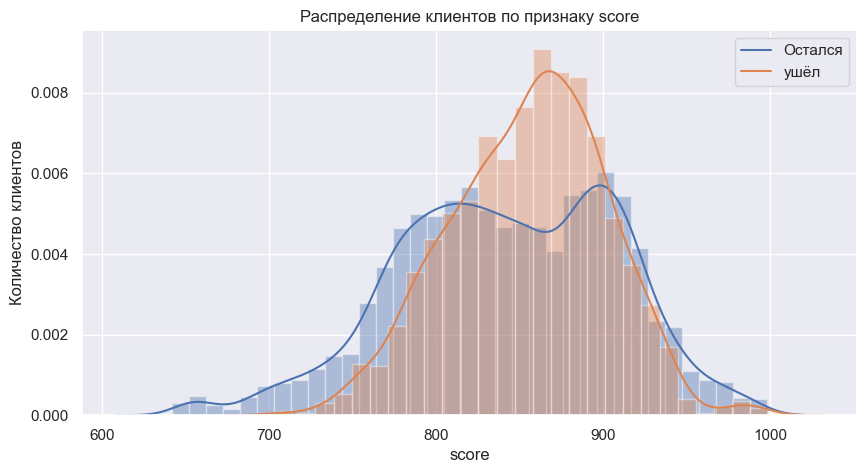

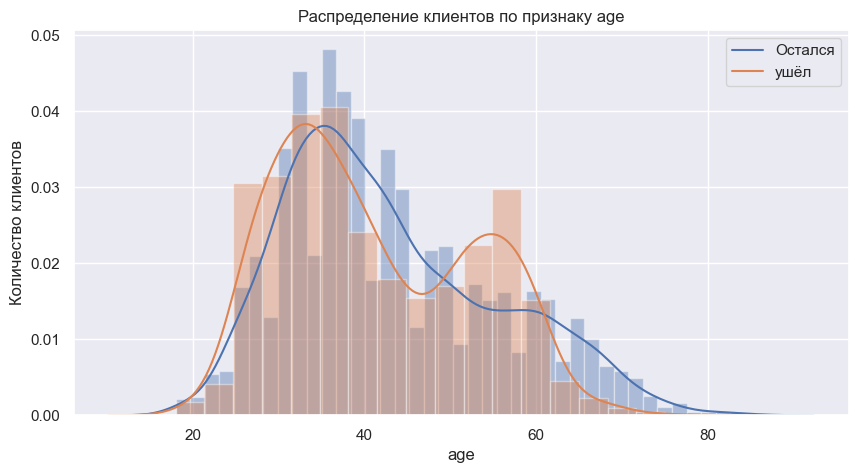

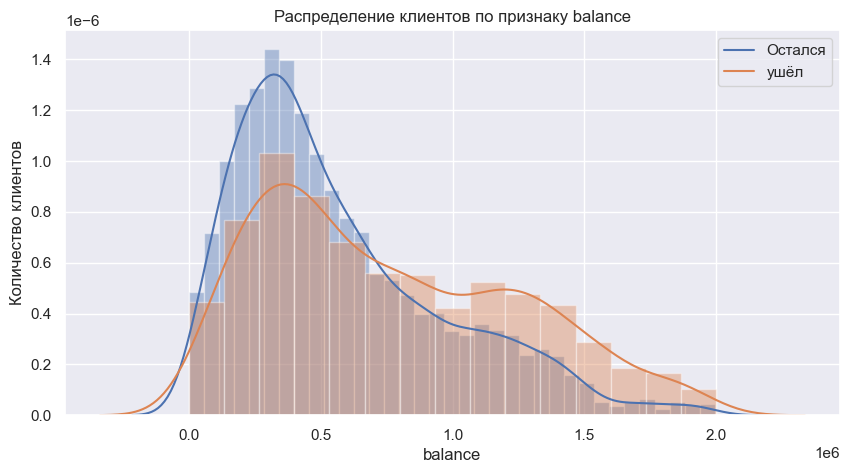

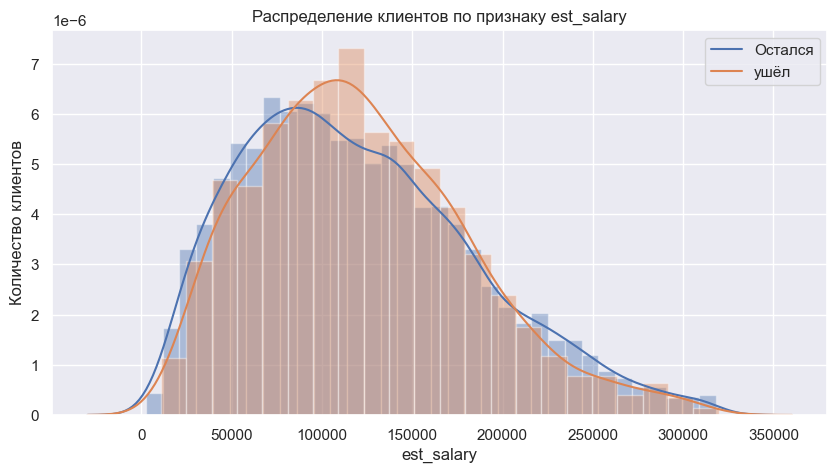

In [41]:
for column in ['score', 'age', 'balance', 'est_salary']:
    plt.figure(figsize=(10, 5))
    sns.distplot(normal[normal['churn']==0][column])
    sns.distplot(normal[normal['churn']==1][column])
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.ylabel('Количество клиентов')
    plt.xlabel(column)
    plt.legend(['Остался', 'ушёл'])
    plt.show()

**Вывод:**
- в отток сильно уходят клиенты со скоринговым баллом 810-900;
- в основном выделаются клиенты 45-60 лет и молодые от 21 до 27 лет;
- клиенты с большим балансом уходят чаще;
- ЗП так же чуть смещена в большую сторону.

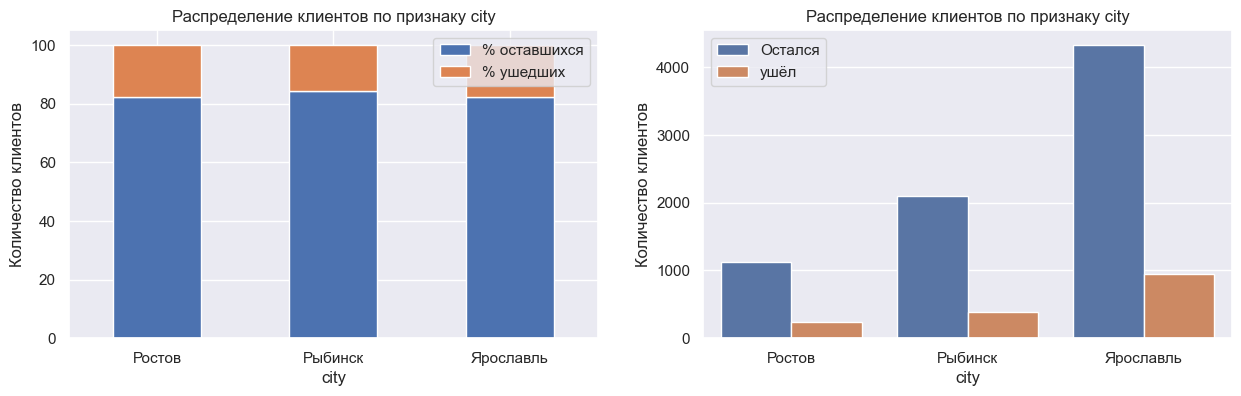

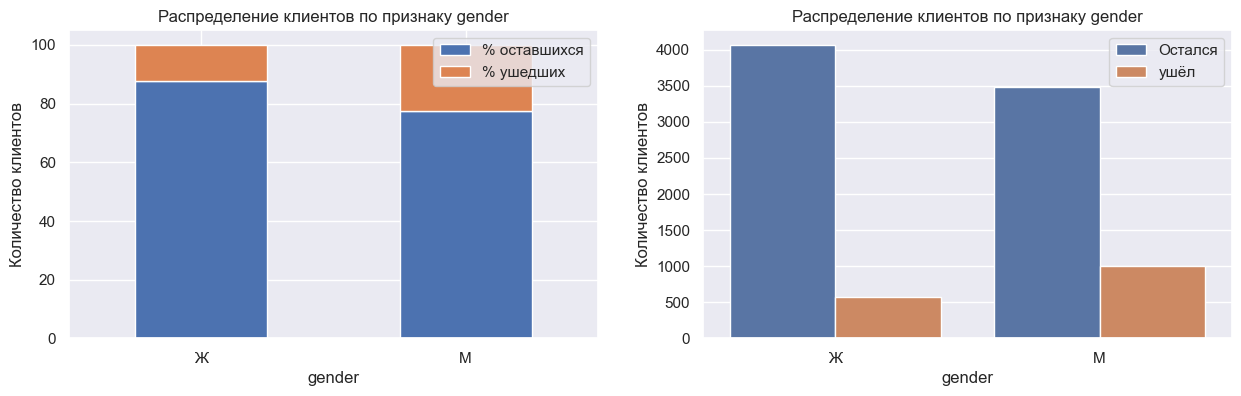

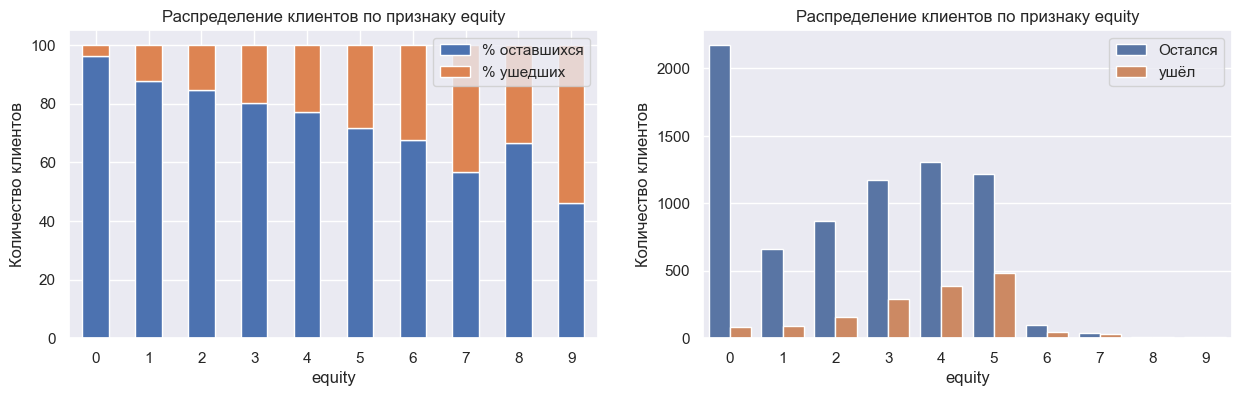

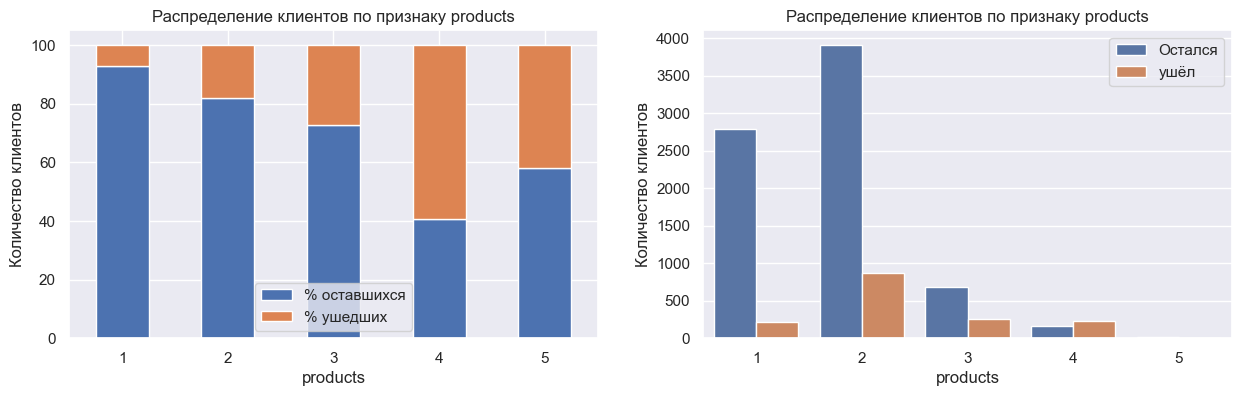

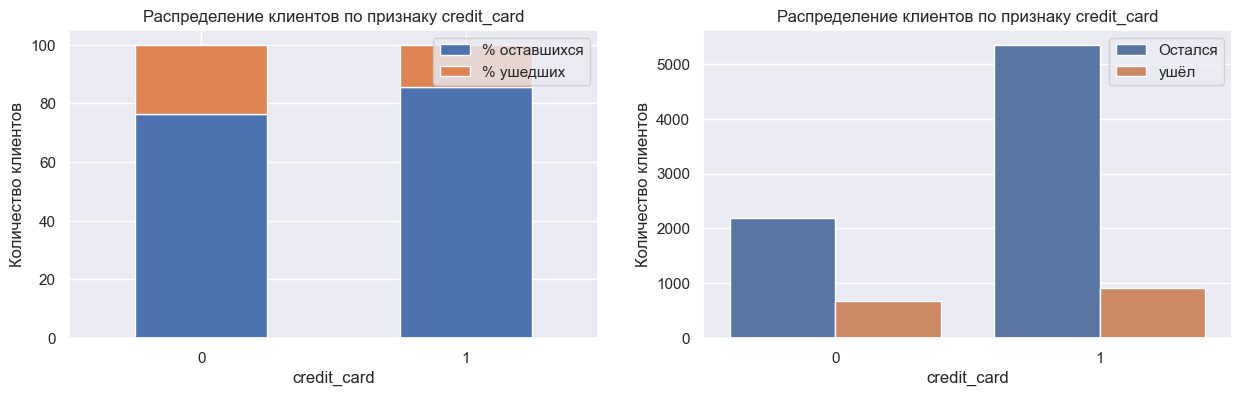

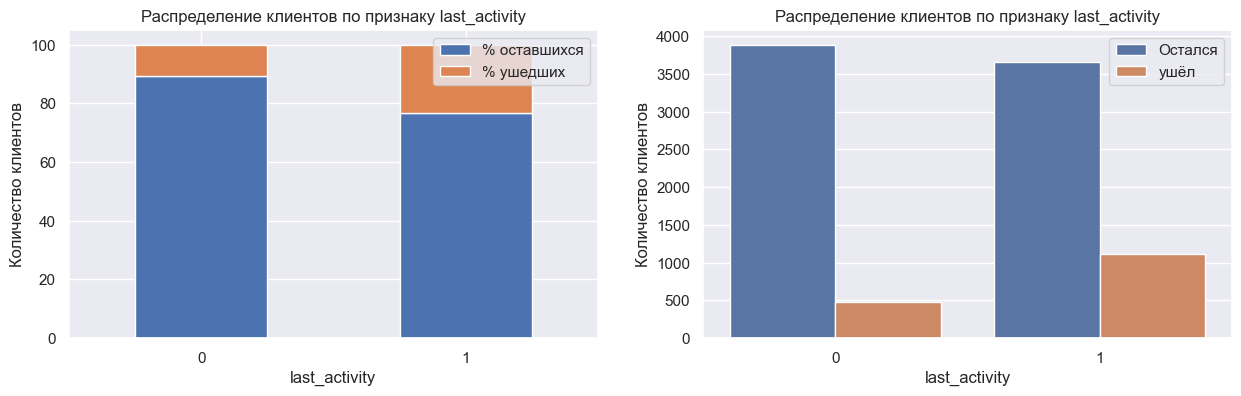

In [42]:
for column in ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity']:
    df = (normal[normal[column].duplicated(keep=False)].pivot_table(index=column, values='user_id', aggfunc='count', fill_value=0)
    .merge(normal[normal['churn'] == 1].groupby(column)['churn'].count().round().reset_index(), on=column).rename(columns={'churn': 'ушёл'})
    .merge(normal[normal['churn'] == 0].groupby(column)['churn'].count().round().reset_index(), on=column).rename(columns={'churn': 'остался'})    
    .rename(columns={'user_id': 'count'})
    .assign(**{'% оставшихся': lambda x: round(x['остался'] / x['count'] * 100, 1),
               '% ушедших': lambda x: round(x['ушёл'] / x['count'] * 100, 1)}))
    df = df.drop(columns = ['ушёл', 'остался', 'count'])
    
    fig, ax = plt.subplots(figsize = (15, 4))
    
    df.set_index(column).plot(kind='bar',stacked= True, ax = plt.subplot(1, 2, 1))
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.ylabel('Количество клиентов')
    plt.xlabel(column)
    plt.xticks (rotation=0)
    
    normal = normal.sort_values(column)
    sns.countplot(x = column, hue = 'churn', data = normal, ax = plt.subplot(1, 2, 2))
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.ylabel('Количество клиентов')
    plt.xlabel(column)
    plt.legend(['Остался', 'ушёл'])
    plt.show()

**По графикам можно сказать, что на отток влияют признаки:**
- доля ушедших по городам почти одинаковая;
- пол (мужчины попадают в эту категорию чуть чаще);
- чем больше оценка недвижимости, тем чаще уходят (оценка 7 исключение);
- клиенты, использующие 4 продукта уходят в отток больше, далее 5-3-2-1;
- клиенты без кредитной карты уходят чаще, чем с ней;
- у ушедших клиентов активность была выше.

**Исследование VIP клиентов.**

Посмотрим на средние значения ВИП пользователей в двух группах — тех, кто ушел в отток (1) и тех, кто остался (0).

In [43]:
VIP.groupby('churn').agg('mean').T

churn,0,1
user_id,171168.89,175641.13
score,887.07,915.64
age,44.25,42.82
equity,1.94,4.26
balance,4315258.37,3638647.11
products,1.63,2.68
credit_card,0.70,0.42
last_activity,0.47,0.71
est_salary,516401.23,324656.74


- средний баланс выше у тех, кто остался;
- кол-во продуктов больше у ушедших клиентов;
- активность ушедших клиентов была выше;
- средняя зп больше у оставшихся клиентов;

В остальном, отличия небольшие.

In [44]:
print('Количество ушедших клиентов:', len(VIP.query('churn == 1')))
print('Процент от общего числа:',len(VIP.query('churn == 1'))/len(VIP)*100)

Количество ушедших клиентов: 238
Процент от общего числа: 29.899497487437188


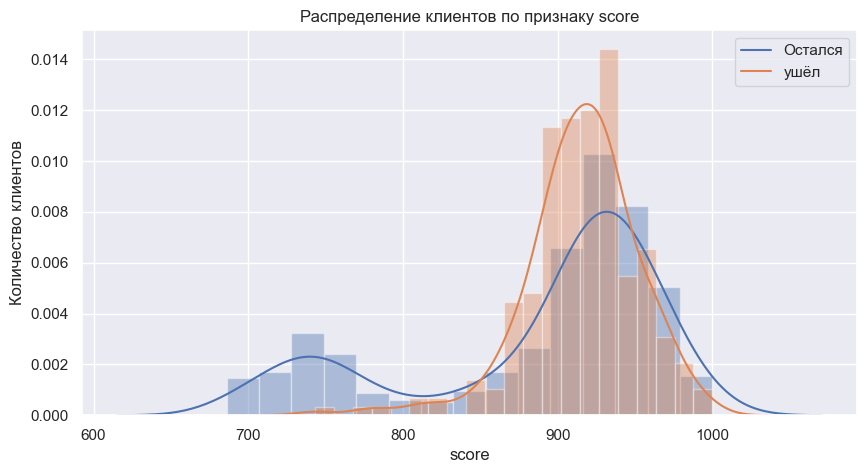

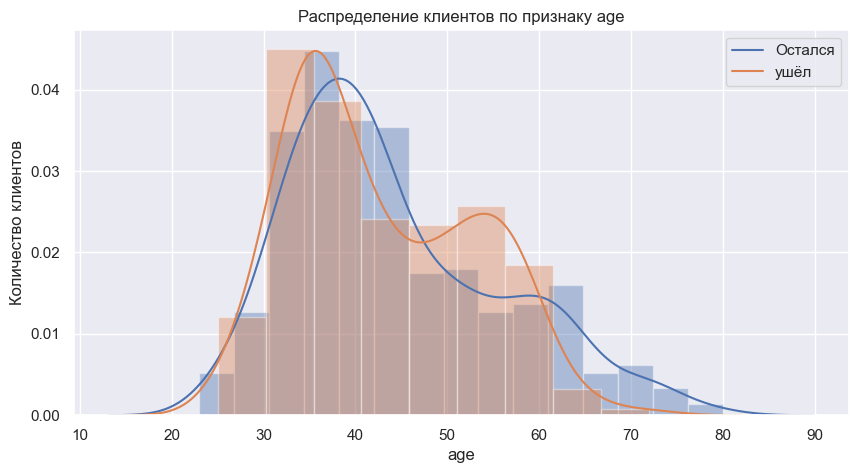

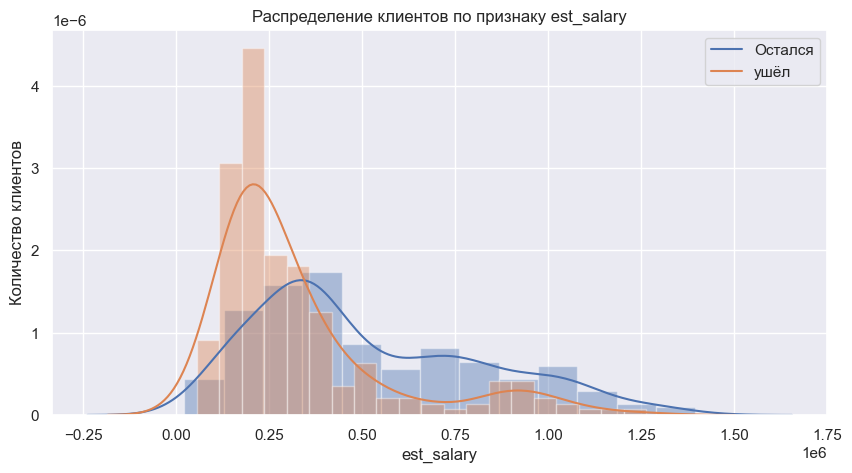

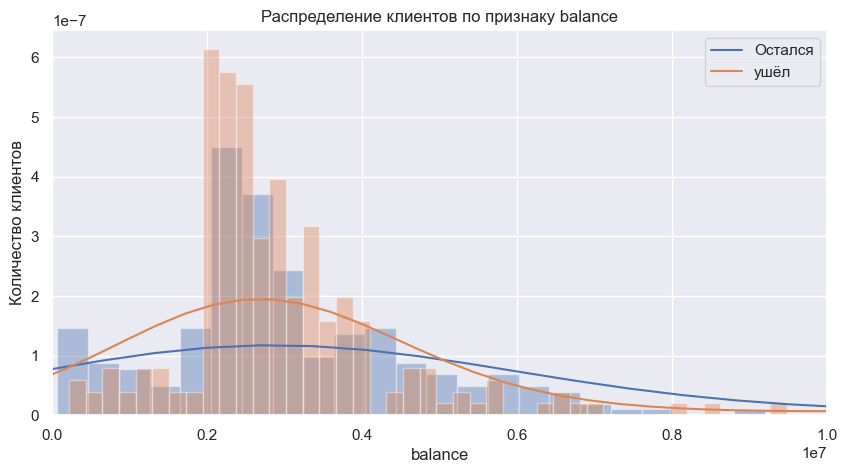

In [45]:
for column in ['score', 'age', 'est_salary']:
    plt.figure(figsize=(10, 5))
    sns.distplot(VIP[VIP['churn']==0][column])
    sns.distplot(VIP[VIP['churn']==1][column])
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.ylabel('Количество клиентов')
    plt.xlabel(column)
    plt.legend(['Остался', 'ушёл'])
    plt.show()
    
plt.figure(figsize=(10, 5))
sns.distplot(VIP[VIP['churn']==0]['balance'], bins=300)
sns.distplot(VIP[VIP['churn']==1]['balance'], bins=300)
plt.title(f'Распределение клиентов по признаку balance')
plt.ylabel('Количество клиентов')
plt.xlabel('balance')
plt.legend(['Остался', 'ушёл'])
plt.xlim(0,10000000)
plt.show()

**Вывод:**
- в отток сильно уходят клиенты со скоринговым баллом 850-950;
- в основном выделаются клиенты 47-60 лет и молодые от 27 до 37 лет;
- клиенты с меньшим балансом уходят чаще;
- ЗП так же смещена в меньшую сторону.

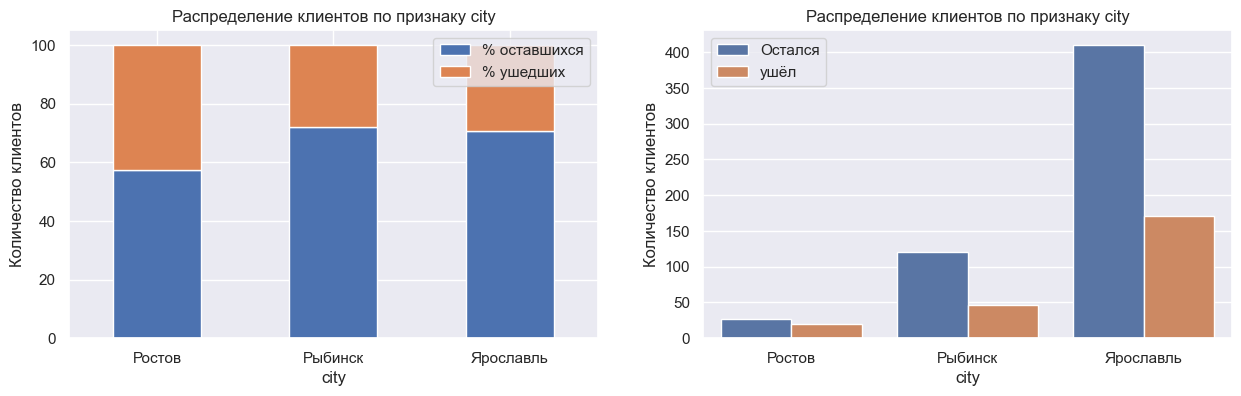

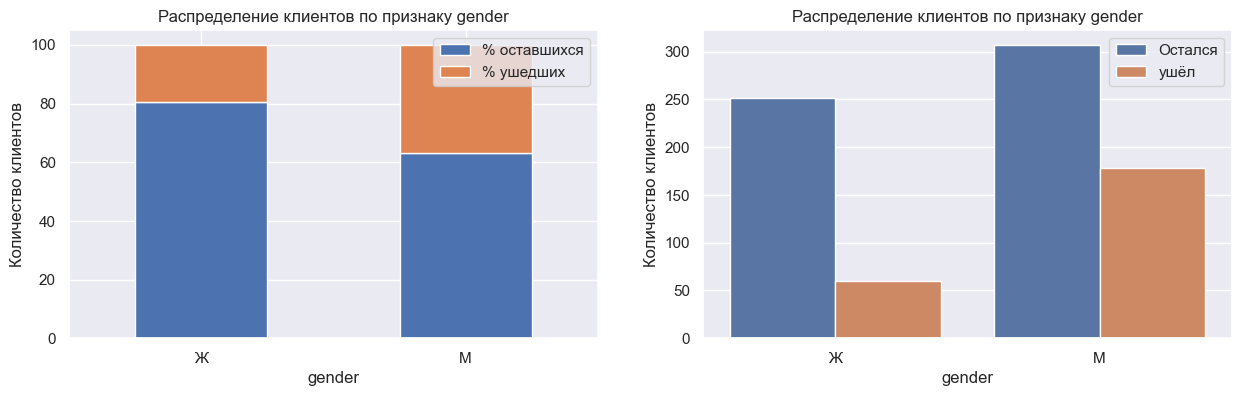

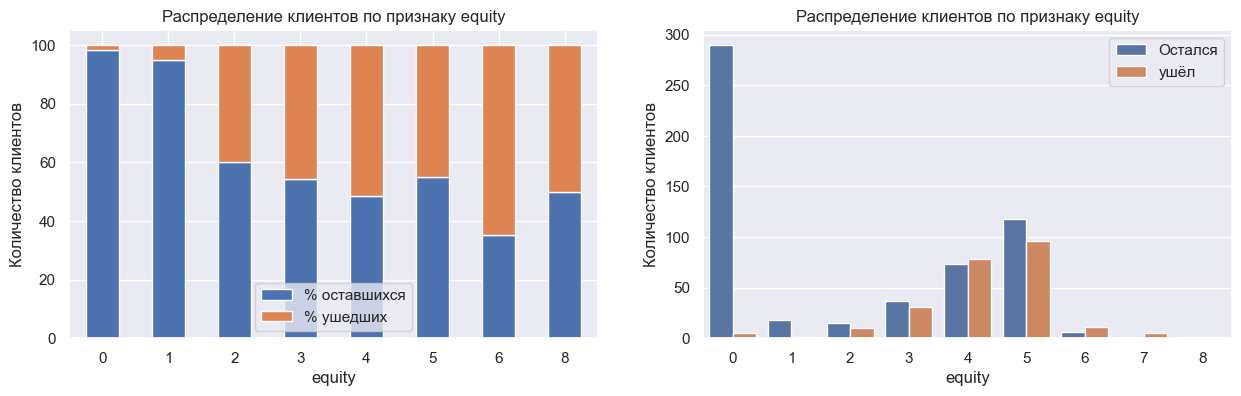

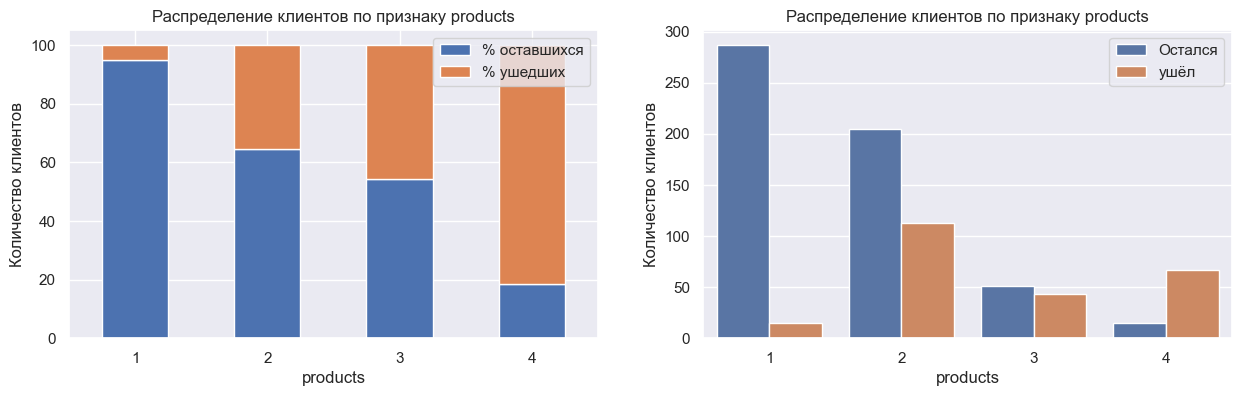

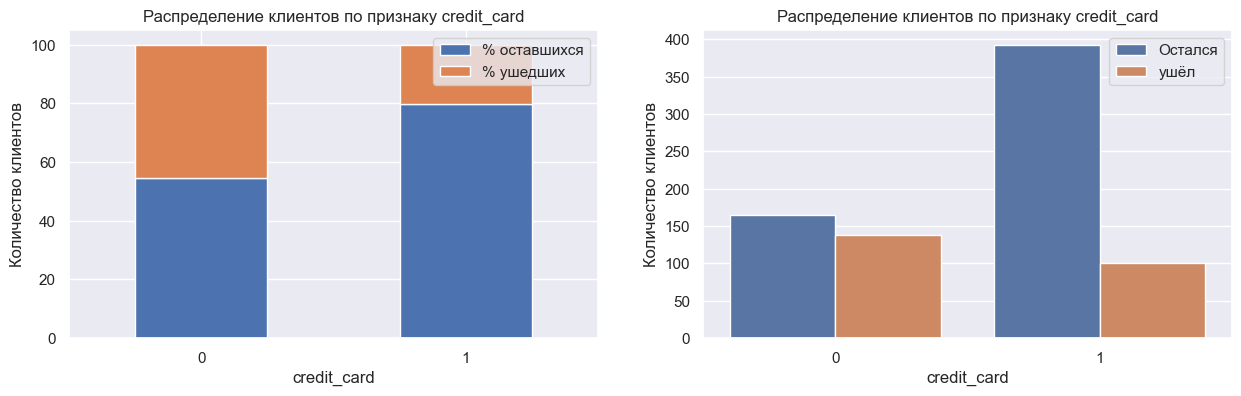

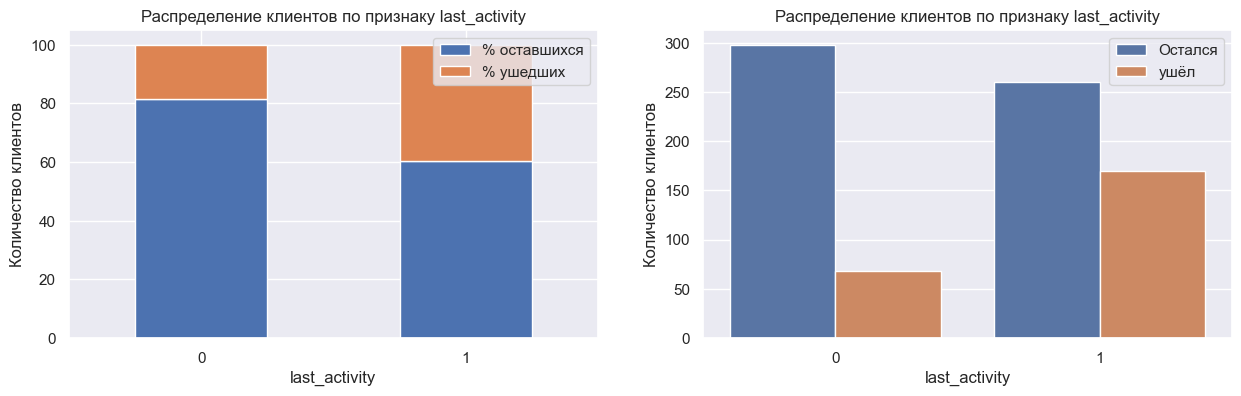

In [46]:
for column in ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity']:
    df = (VIP[VIP[column].duplicated(keep=False)].pivot_table(index=column, values='user_id', aggfunc='count', fill_value=0)
    .merge(VIP[VIP['churn'] == 1].groupby(column)['churn'].count().round().reset_index(), on=column).rename(columns={'churn': 'ушёл'})
    .merge(VIP[VIP['churn'] == 0].groupby(column)['churn'].count().round().reset_index(), on=column).rename(columns={'churn': 'остался'})    
    .rename(columns={'user_id': 'count'})
    .assign(**{'% оставшихся': lambda x: round(x['остался'] / x['count'] * 100, 1),
               '% ушедших': lambda x: round(x['ушёл'] / x['count'] * 100, 1)}))
    df = df.drop(columns = ['ушёл', 'остался', 'count'])
    
    fig, ax = plt.subplots(figsize = (15, 4))
    
    df.set_index(column).plot(kind='bar',stacked= True, ax = plt.subplot(1, 2, 1))
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.ylabel('Количество клиентов')
    plt.xlabel(column)
    plt.xticks (rotation=0)
    
    VIP = VIP.sort_values(column)
    sns.countplot(x = column, hue = 'churn', data = VIP, ax = plt.subplot(1, 2, 2))
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.ylabel('Количество клиентов')
    plt.xlabel(column)
    plt.legend(['Остался', 'ушёл'])
    plt.show()

**По графикам можно сказать, что на отток влияют признаки:**
- в Ростове отток больше, хотя там меньше всего клиентов;
- мужчины попадают в отток чаще;
- в среднем, чем больше оценка недвижимости, тем больше отток;
- чем больше банковских продуктов, тем отток сильнее;
- без кредитной карты уходят чаще, чем с ней;
- у ушедших клиентов активность была выше.

### Коррялиционный анализ

У нас смешанный набор признаков и использование корреляции Пирсона некорректно, в данном случае лучше использовать корреляцию Фик (она умеет отлавливать нелинейные зависимости).

In [47]:
# преобразуем категориальные переменные
cor_data = pd.get_dummies(normal)

In [48]:
cor_data.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,status_balance_баланс заполнен,status_balance_баланс пропущен,status_normal
6668,145020,852.00,47.00,3,185983.72,2,0,0,243003.18,0,0,0,1,0,1,1,0,1
1722,118265,788.00,40.00,4,441399.49,3,1,0,248344.76,0,0,0,1,0,1,1,0,1
591,178799,808.00,36.00,3,589343.29,3,1,0,221976.37,0,0,1,0,1,0,1,0,1
8617,136993,799.00,61.00,4,491156.68,3,1,0,29006.13,1,0,0,1,0,1,1,0,1
7426,200043,824.00,42.00,3,378705.78,3,1,0,25389.52,0,0,0,1,1,0,1,0,1


In [49]:
phik_normal = cor_data[['churn', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'city_Ростов', 'city_Рыбинск', 'city_Ярославль', 'gender_Ж', 'gender_М']]

interval columns not set, guessing: ['churn', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'city_Ростов', 'city_Рыбинск', 'city_Ярославль', 'gender_Ж', 'gender_М']


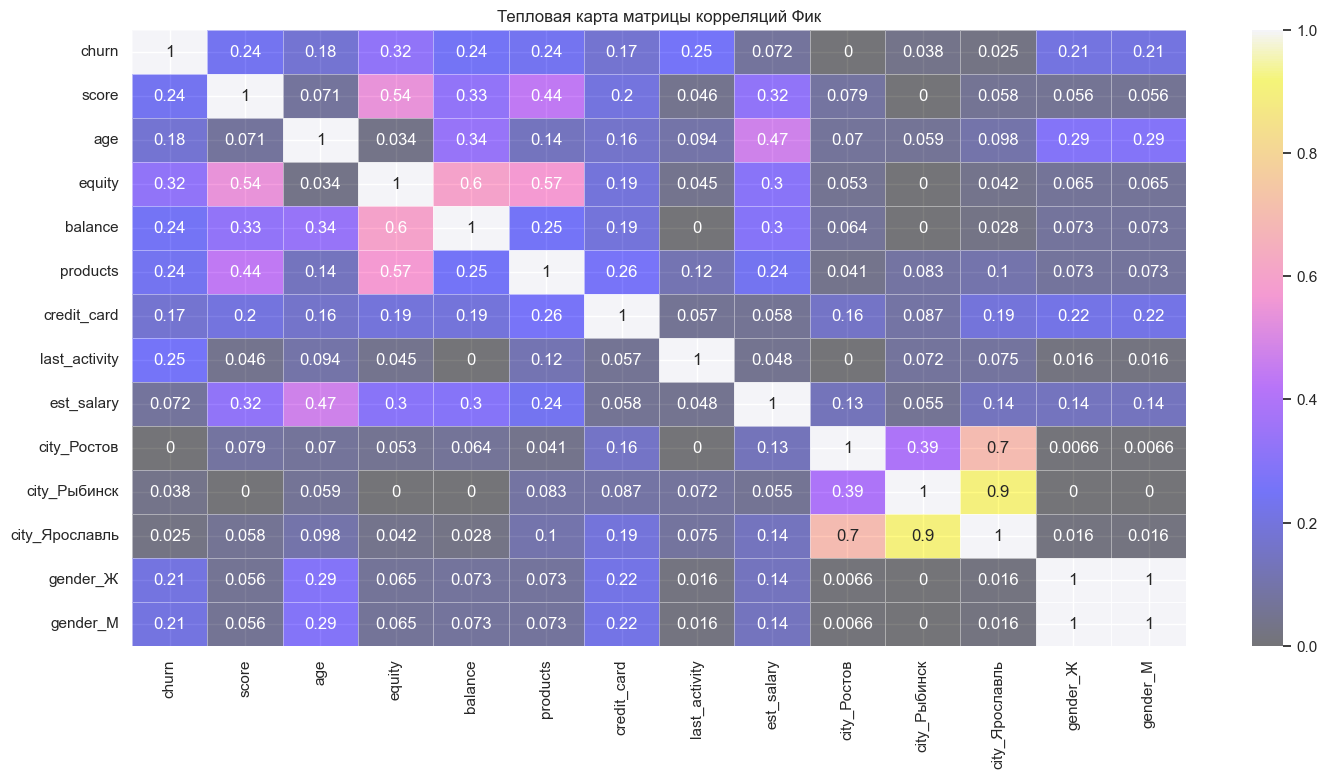

In [50]:
f, ax = plt.subplots(figsize=(17, 8))

sns.heatmap(phik_normal.phik_matrix(), annot=True, linewidths=.5, ax=ax, cmap='gnuplot2', alpha=.5)
plt.title('Тепловая карта матрицы корреляций Фик')
plt.show()

**На отток влияет:**
- оценка недвижимости (умеренная зависимость);
- остальные зависимости слабые.


**Посмотрим на другие зависимости:**
- заметная зависимость между балансом и оценкой недвижимости (0,6);
- заметная зависимость между оценкой недвижимости и количеством продуктов (0,57);
- заметная зависимость между оценкой недвижимости и скорингом (0,57);
- умеренная зависимость между возрастом и оценочной зп (0,47);
- умеренная зависимость между скорингом и кол-вом продуктов (0,44);

In [51]:
# преобразуем категориальные переменные
cor_data_vip = pd.get_dummies(VIP)

In [52]:
phik_VIP = cor_data_vip[['churn', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'city_Ростов', 'city_Рыбинск', 'city_Ярославль', 'gender_Ж', 'gender_М']]

interval columns not set, guessing: ['churn', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'city_Ростов', 'city_Рыбинск', 'city_Ярославль', 'gender_Ж', 'gender_М']


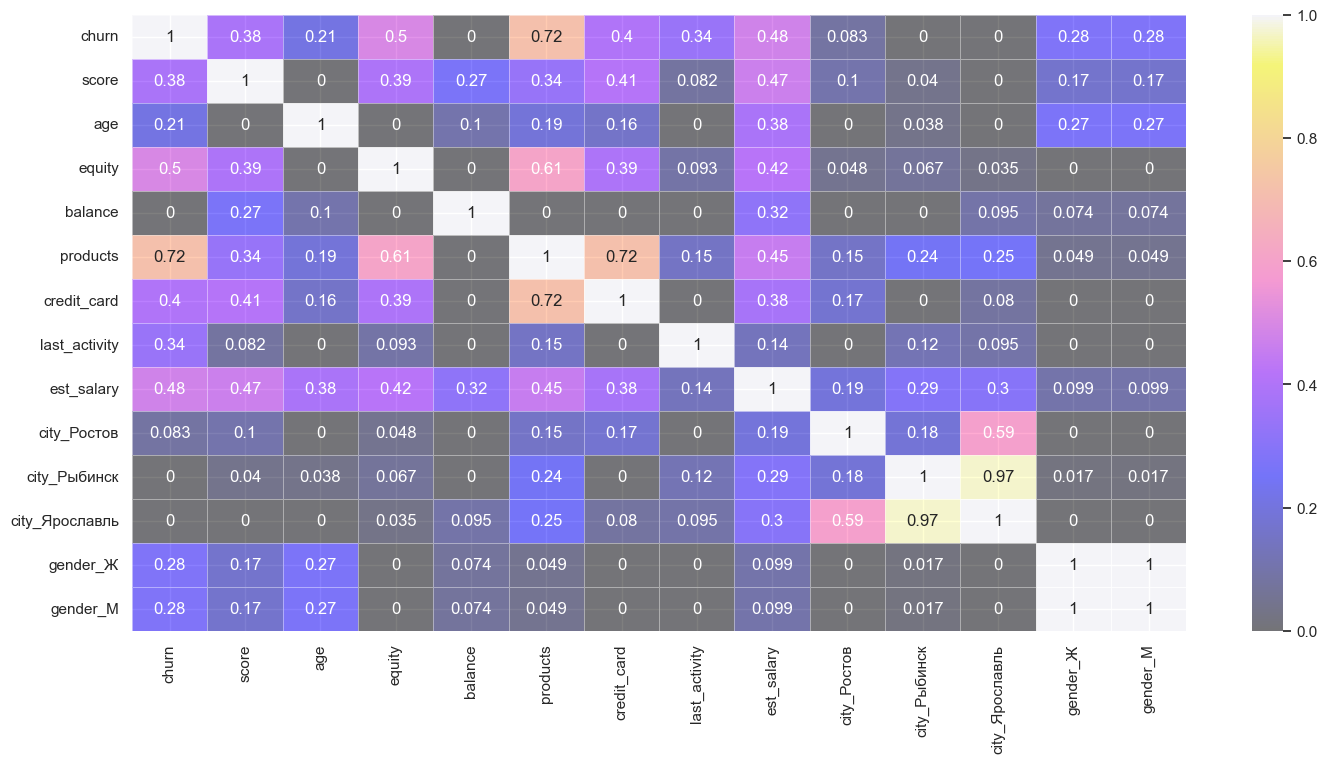

In [53]:
f, ax = plt.subplots(figsize=(17, 8))

sns.heatmap(phik_VIP.phik_matrix(), annot=True, linewidths=.5, ax=ax, cmap='gnuplot2', alpha=.5)
plt.show()

**На отток влияет:**
- количество продуктов (высокая зависимость - 0,72);
- оценка недвижимости (заметная зависимость - 0,5);
- оценочная зп (умеренная зависимость - 0,48).


**Посмотрим на другие зависимости:**
- высокая зависимость между кредитной картой и кол-вом продуктов (0,72);
- заметная зависимость между оценкой недвижимости и количеством продуктов (0,61);
- заметная зависимость между балансом и оценкой недвижимости (0,6);
- умеренная зависимость между скорингом и оценочной зп (0,47).

<a id="hypothesis"></a> 
## Проверка гипотез

### Проверка гипотезы о различии возраста клиентов с 1 и 2 продуктами

Гипотеза о различии возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Сформулируем нулевую и альтернативную гипотезы:

**H₀**: Средний возраст клиентов с 1 продуктом и с 2 продуктами равны

**H₁**: Средний возраст клиентов с 1 продуктом и с 2 продуктами не равны

**Посмотрим на размер выборок и распределение**

In [54]:
print(data[data['products']==1]['age'].count())
print(data[data['products']==2]['age'].count())
print(data.query('products == 1')['age'].count()/data.query('products == 2')['age'].count())

3306
5095
0.6488714425907752


Критический уровень статистической значимости возьмем `alpha = 0.001` т.к. выборки более тысячи

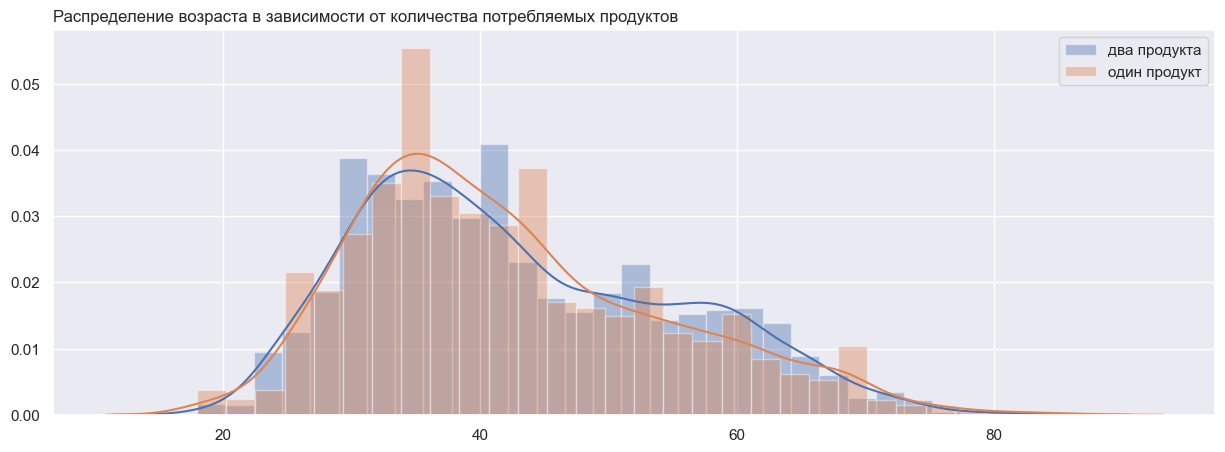

In [55]:
# посмотрим на распределение возраста
plt.figure(figsize=(15, 5))

sns.distplot(data[data['products'] == 2]['age'], label = 'два продукта')
sns.distplot(data[data['products'] == 1]['age'], label = 'один продукт')

plt.title('Распределение возраста в зависимости от количества потребляемых продуктов', loc='left')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

Данные распределены не нормально.

**Проверим данные на нормальность с помощью критерия Шапиро-Уилка**

In [56]:
alpha = 0.001  # критический уровень статистической значимости

results = st.shapiro(data.query('products == 1')['age'])
p_value = results[1]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  3.514300793252229e-30
Отвергаем нулевую гипотезу: распределение не нормально


In [57]:
alpha = 0.001  # критический уровень статистической значимости

results = st.shapiro(data.query('products == 2')['age'])
p_value = results[1]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  9.164443814795302e-35
Отвергаем нулевую гипотезу: распределение не нормально


**Воспользуемся критерием Манна-Уитни, поскольку он не требует нормального распределения выборок.**

In [60]:
alpha = 0.001 # критический уровень статистической значимости

results = st.mannwhitneyu(data[data['products']==1]['age'], data[data['products']==2]['age'])
print('p-значение: ', "{0:.3f}".format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.072
Не получилось отвергнуть нулевую гипотезу


Проведенный тест показал, что у нас не получилось отвергнуть нулевую гипотезу о том, что средний возраст клиентов с 1 продуктом и с 2 продуктами равны.

### Проверка гипотезы о различии банковского рейтинга клиентов с 1 и 2 продуктами

Гипотеза о различии среднего банковского рейтинга между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Сформулируем нулевую и альтернативную гипотезы:

**H₀**: Средний банковский рейтинг клиентов с 1 продуктом и с 2 продуктами равны

**H₁**: Средний банковский рейтинг клиентов с 1 продуктом и с 2 продуктами не равны

**Посмотрим на размер выборок и распределение**

In [61]:
print(data[data['products'] == 1]['score'].count())
print(data[data['products'] == 2]['score'].count())
print(data[data['products'] == 1]['score'].count()/data[data['products'] == 2]['score'].count())

3306
5095
0.6488714425907752


Критический уровень статистической значимости возьмем `alpha = 0.001` т.к. выборки более тысячи

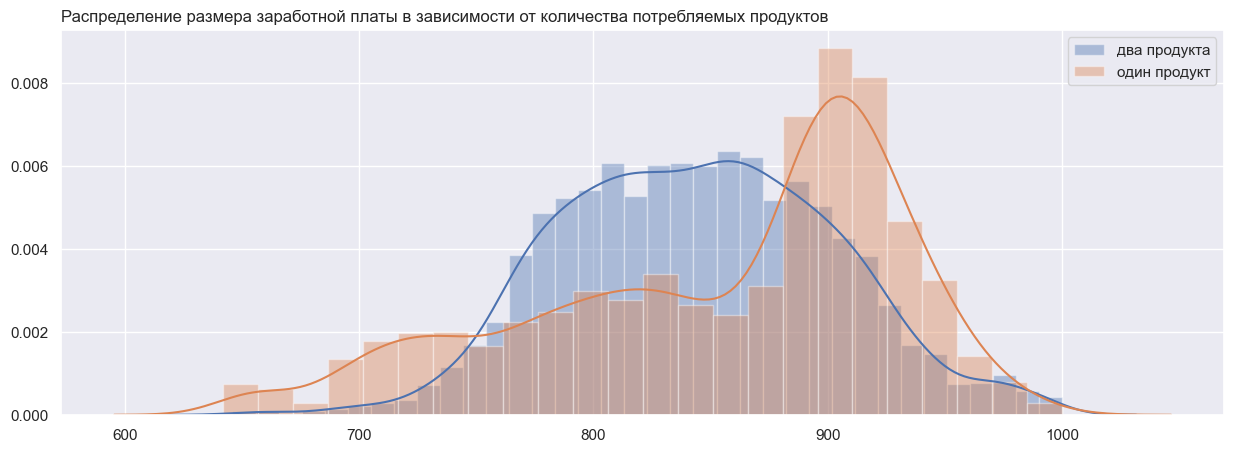

In [62]:
plt.figure(figsize=(15, 5))

sns.distplot(data[data['products'] == 2]['score'], label = 'два продукта')
sns.distplot(data[data['products'] == 1]['score'], label = 'один продукт')

plt.title('Распределение размера заработной платы в зависимости от количества потребляемых продуктов', loc='left')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

Данные распределены не нормально.

**Проверим данные на нормальность с помощью критерия Шапиро-Уилка**

In [63]:
alpha = 0.001  # критический уровень статистической значимости

results = st.shapiro(data.query('products == 1')['score'])
p_value = results[1]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  1.2023671747869094e-36
Отвергаем нулевую гипотезу: распределение не нормально


In [64]:
alpha = 0.001  # критический уровень статистической значимости

results = st.shapiro(data.query('products == 2')['score'])
p_value = results[1]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  5.165969318987607e-10
Отвергаем нулевую гипотезу: распределение не нормально


**Воспользуемся критерием Манна-Уитни, поскольку он не требует нормального распределения выборок.**

In [66]:
alpha = 0.001 # критический уровень статистической значимости

results = st.mannwhitneyu(data[data['products']==1]['score'], data[data['products']==2]['score'])
print('p-значение: ', "{0:.3f}".format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.000
Отвергаем нулевую гипотезу


Проведенный тест показал, что мы отвергаем нулевую гипотезу о том, что средний банковский рейтинг клиентов с 1 продуктом и с 2 продуктами равны.

<a id="segmentation"></a> 
## Сегментация пользователей по количеству потребляемых продуктов

### Исследуем обычных клиентов по кол-ву банковских продуктов

Посмотрим на распределение клиентов по количеству потребляемых продуктов в процентном сотношении.

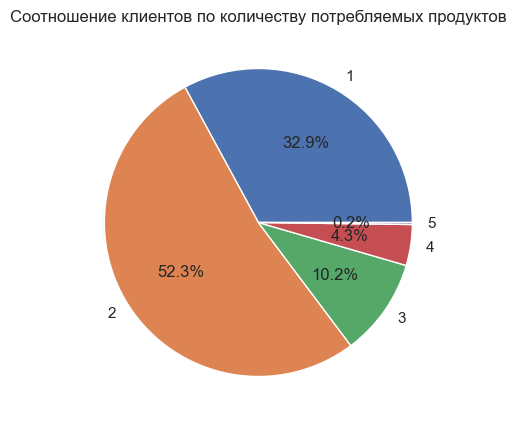

In [67]:
count_product = normal.groupby('products')['products'].count()
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(count_product,labels=count_product.index, autopct='%1.1f%%')
ax1.set_title('Соотношение клиентов по количеству потребляемых продуктов');

- Больше всего клиентов с двумя продуктами - 52%, затем с одним продуктом - 33%

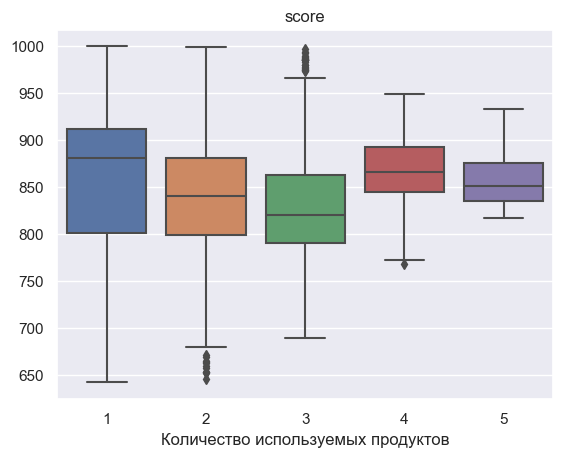

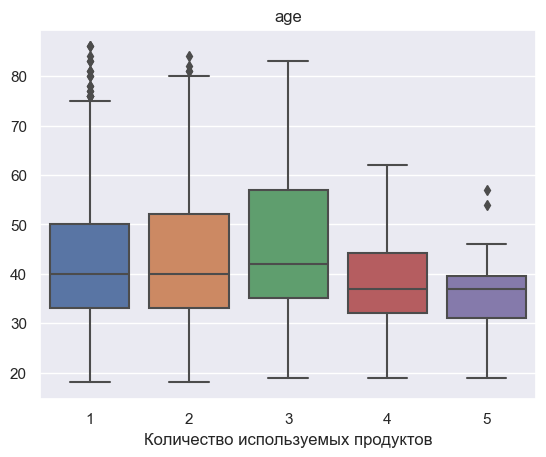

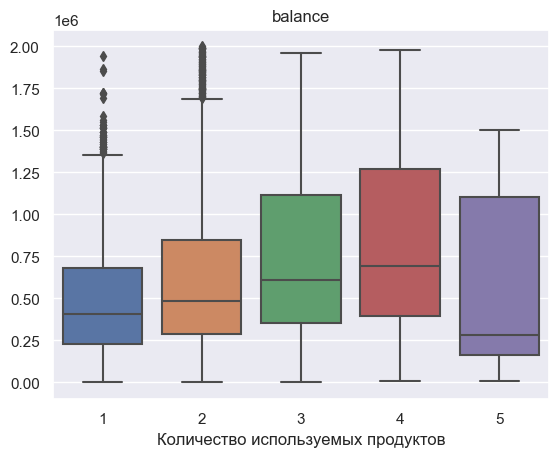

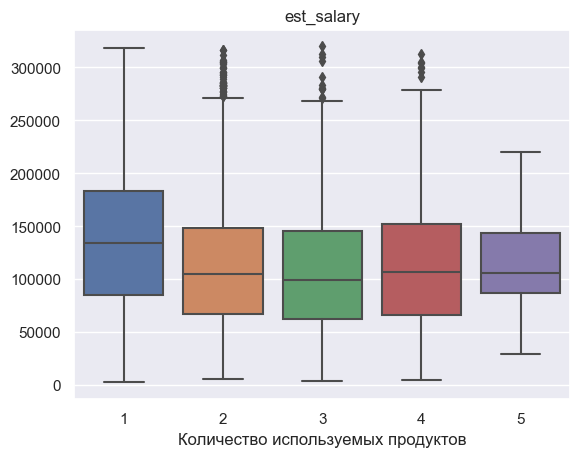

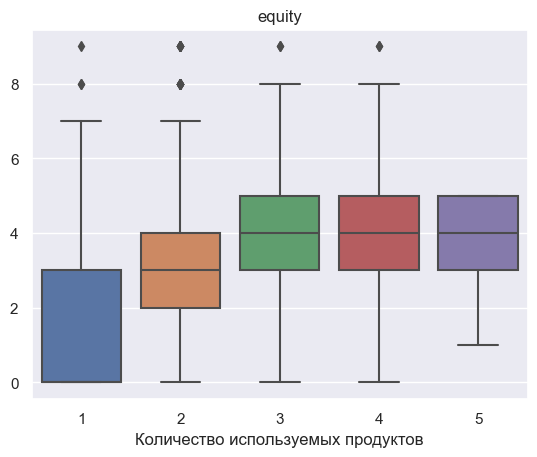

In [68]:
for column in ['score','age','balance','est_salary', 'equity']:
    plt.figure()
    sns.boxplot(data=normal, y = column, x = 'products')
    plt.xlabel('Количество используемых продуктов')
    plt.ylabel('')
    plt.title(column)
    plt.show();

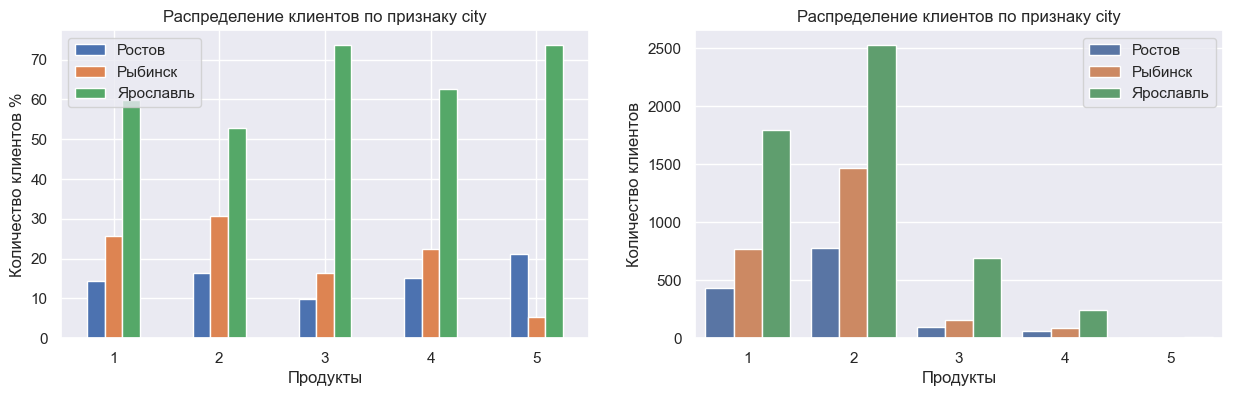

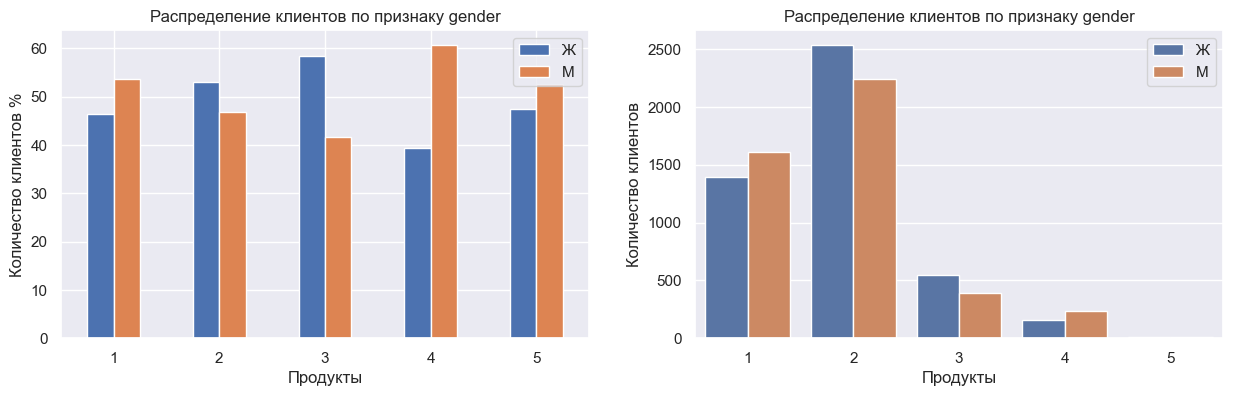

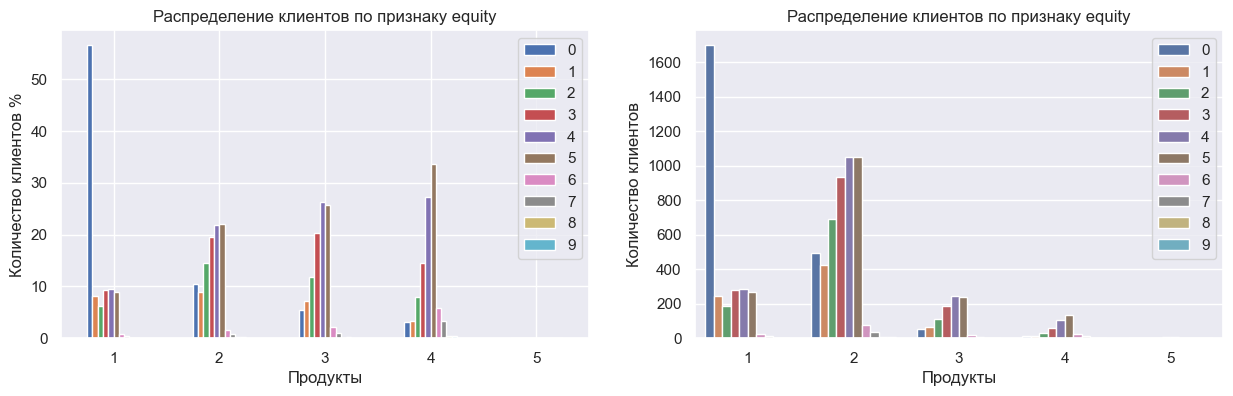

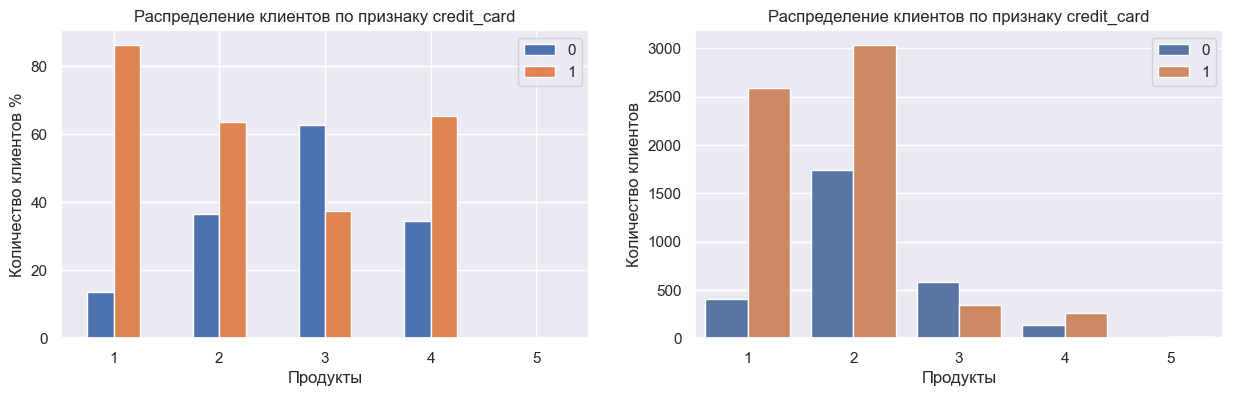

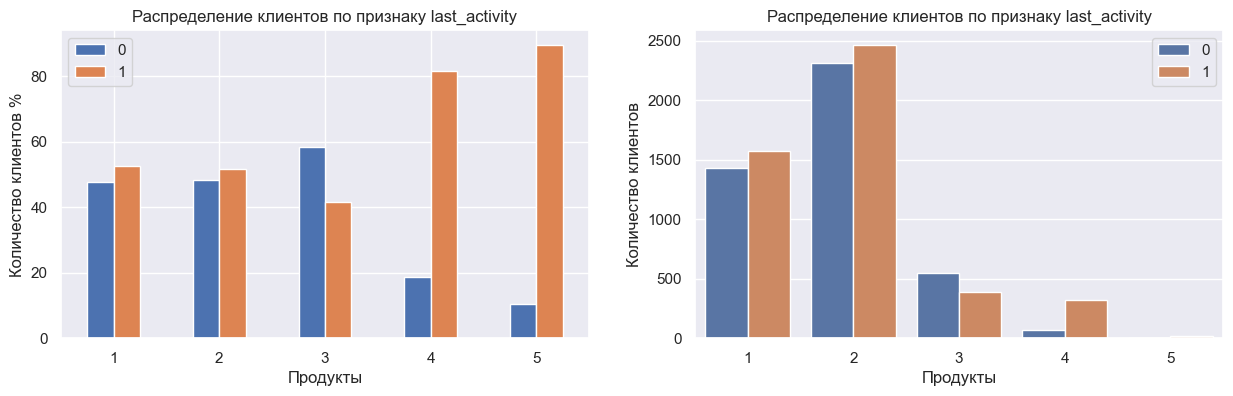

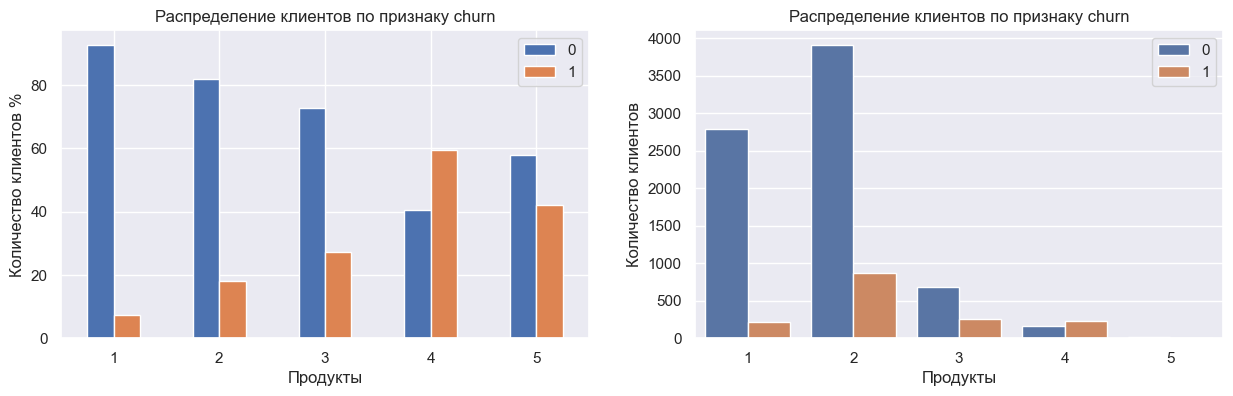

In [69]:
for column in ['city', 'gender', 'equity', 'credit_card', 'last_activity', 'churn']:
    df = normal.pivot_table(columns=column, index = 'products', values = 'user_id', aggfunc = 'count')
    df = df.apply(lambda x: x*100/[sum(i) for i in df.values])
   
    fig, ax = plt.subplots(figsize = (15, 4))    
    df.plot(kind='bar', ax = plt.subplot(1, 2, 1)) #stacked= True
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.xticks (rotation=0)
    plt.xlabel('Продукты')
    plt.ylabel('Количество клиентов %')
    plt.legend()

    normal = normal.sort_values(column)
    sns.countplot(data=normal, x='products', hue=column, ax = plt.subplot(1, 2, 2));
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.ylabel('Количество клиентов')
    plt.xlabel('Продукты')
    plt.legend()
    plt.show()

- мужчин больше с кол-вом продуктов: 1, 4 и 5
- у клиентов с оценкой недвижимости 0 - 1 банковский продукт
- клиенты с тремя продуктами чаще не имеют кредитную карту
- самые активные клиенты с кол-вом продуктов 4 и 5
- чаще уходят клиенты с большим кол-вом продуктов

 Посмотрим процент оттока клиентов по кол-ву продуктов.

In [70]:
churn = normal.groupby('products').agg({'user_id': 'count','churn': 'sum'}).reset_index()
churn['percent_churn'] = round(churn['churn']/churn['user_id']*100)
churn

,products,user_id,churn,percent_churn
0,1,3004,220,7.00
1,2,4777,865,18.00
2,3,935,254,27.00
3,4,392,233,59.00
4,5,19,8,42.00


- в процентном соотношении, клиенты с 4 продуктами уходят чаще
- но больше всего клиенты уходят с двумя продуктами

### Исследуем VIP клиентов по кол-ву банковских продуктов

Посмотрим на распределение клиентов по количеству потребляемых продуктов в процентном сотношении.

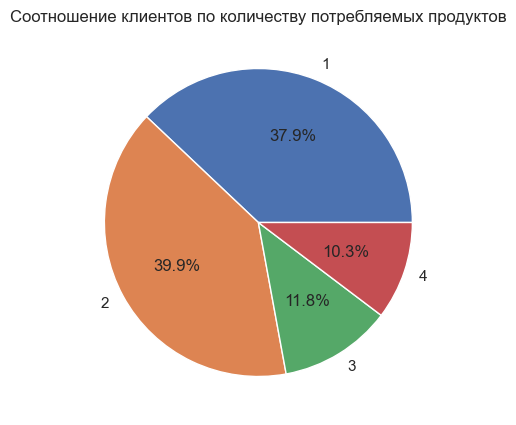

In [71]:
count_product = VIP.groupby('products')['products'].count()
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(count_product,labels=count_product.index, autopct='%1.1f%%')
ax1.set_title('Соотношение клиентов по количеству потребляемых продуктов');

- Больше всего клиентов с двумя продуктами - 40% и одним - 38%

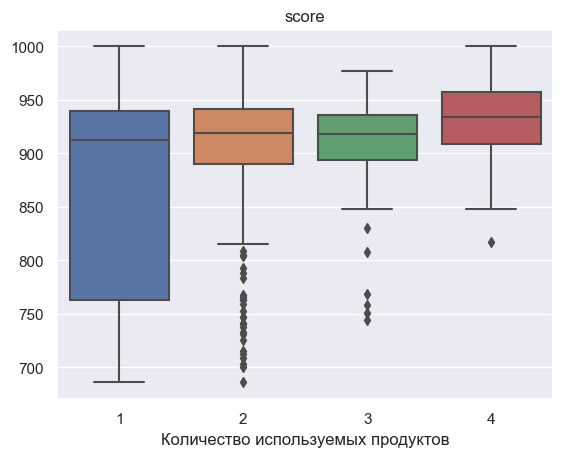

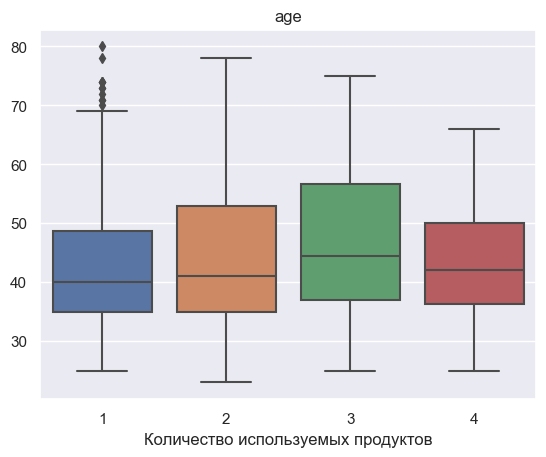

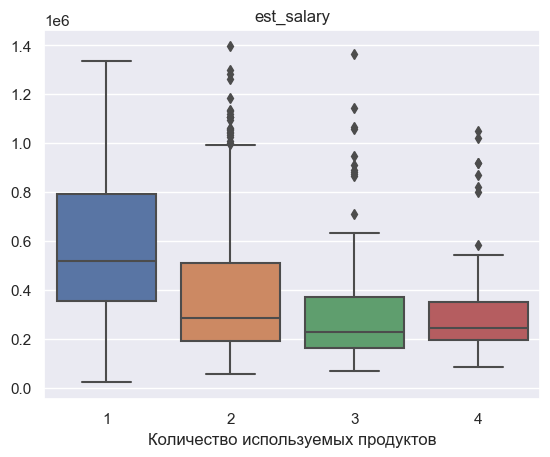

In [72]:
for column in ['score','age','est_salary']:
    plt.figure()
    sns.boxplot(data=VIP, y = column, x = 'products')
    plt.xlabel('Количество используемых продуктов')
    plt.ylabel('')
    plt.title(column)
    plt.show()

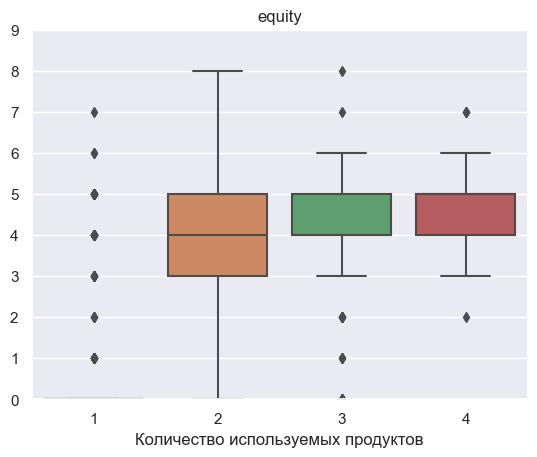

In [73]:
plt.figure()
sns.boxplot(data=VIP, y = 'equity', x = 'products')
plt.xlabel('Количество используемых продуктов')
plt.ylim(0, 9)
plt.ylabel('')
plt.title('equity')
plt.show();

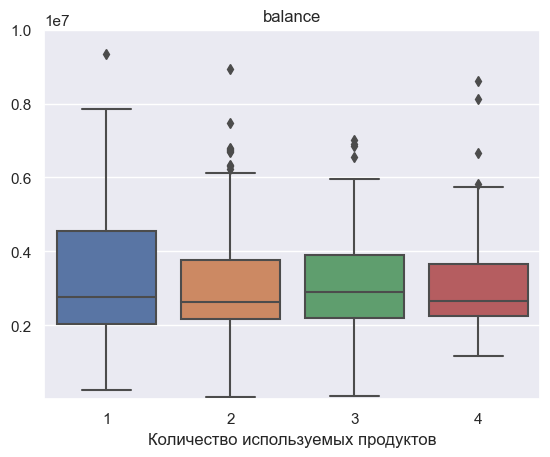

In [74]:
plt.figure()
sns.boxplot(data=VIP, y = 'balance', x = 'products')
plt.xlabel('Количество используемых продуктов')
plt.ylim(1, 10000000)
plt.ylabel('')
plt.title('balance')
plt.show();

- скоринг выше у клиентов с пятью продуктами
- у молодых и пожилых клиентов чаще по одному продукту
- у клиентов с одним продуктом оценочная зп чаще выше, но так же наблюдаем выбросы по другим продуктам

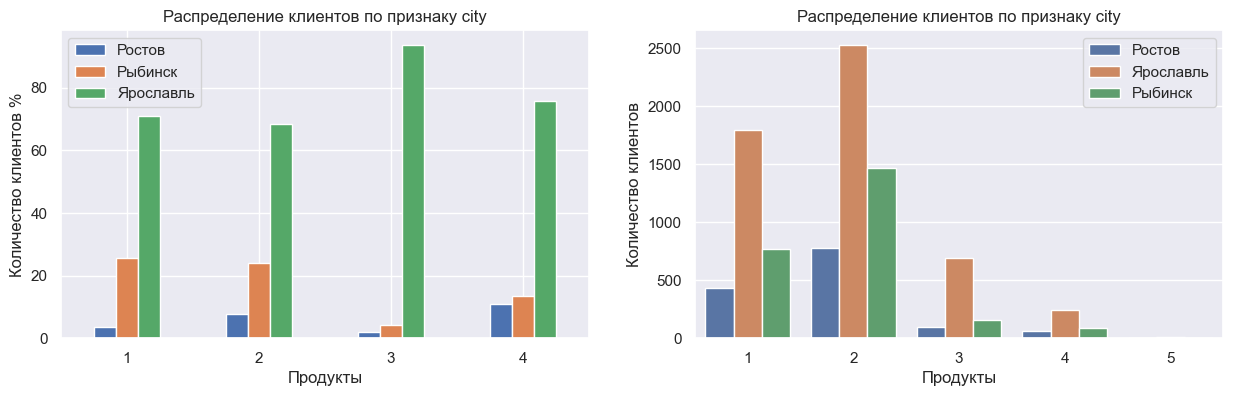

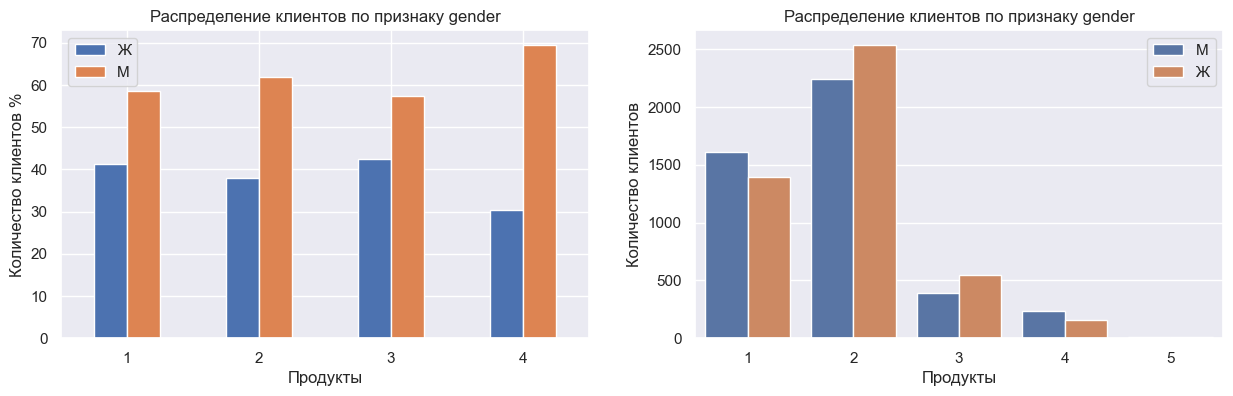

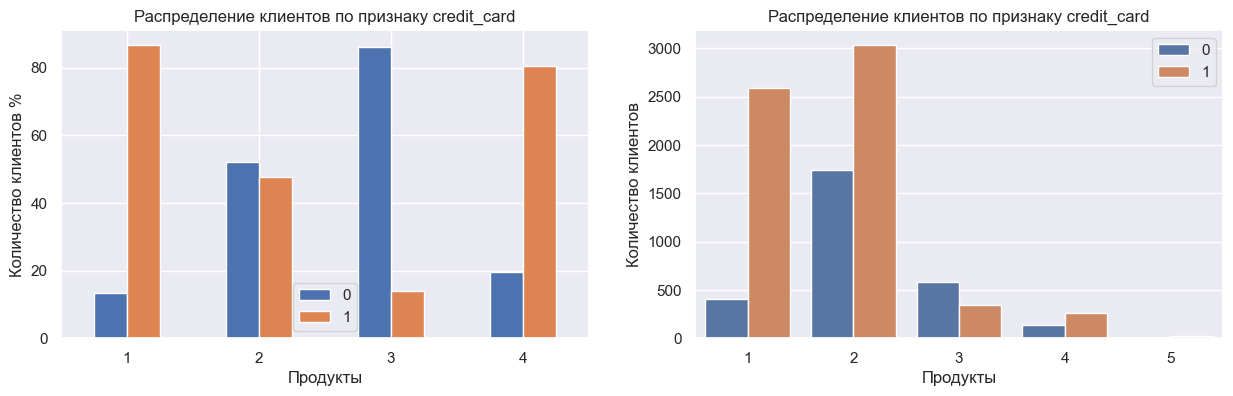

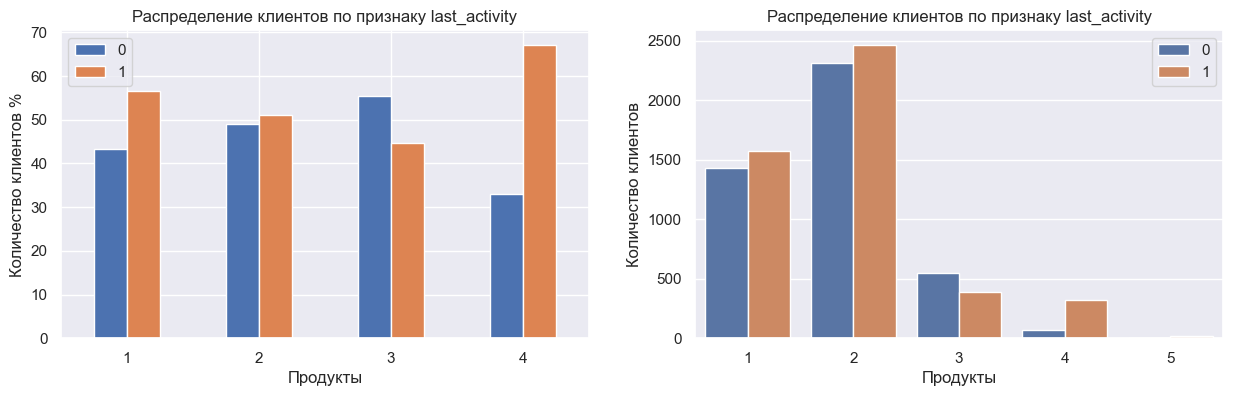

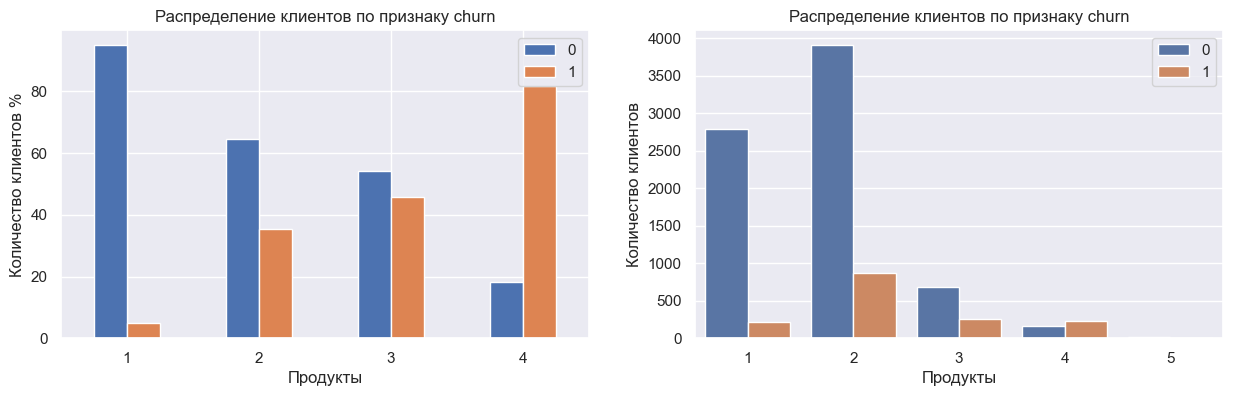

In [75]:
for column in ['city', 'gender', 'credit_card', 'last_activity', 'churn']:
    df = VIP.pivot_table(columns=column, index = 'products', values = 'user_id', aggfunc = 'count')
    df = df.apply(lambda x: x*100/[sum(i) for i in df.values])
   
    fig, ax = plt.subplots(figsize = (15, 4))    
    df.plot(kind='bar', ax = plt.subplot(1, 2, 1)) #stacked= True
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.xticks (rotation=0)
    plt.xlabel('Продукты')
    plt.ylabel('Количество клиентов %')
    plt.legend()

    VIP = VIP.sort_values(column)
    sns.countplot(data=normal, x='products', hue=column, ax = plt.subplot(1, 2, 2));
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.ylabel('Количество клиентов')
    plt.xlabel('Продукты')
    plt.legend()
    plt.show()

- женщины в сегменте ВИП чаще пользуются всеми продуктами
- клиенты с одним и четырьмя продуктами чаще имеют кредитную карту
- меньше всего активны клиенты с тремя продуктами
- клиенты с 4 продуктами уходят чаще

Посмотрим процент оттока клиентов по кол-ву продуктов.

In [76]:
churn = VIP.groupby('products').agg({'user_id': 'count','churn': 'sum'}).reset_index()
churn['percent_churn'] = round(churn['churn']/churn['user_id']*100)
churn

,products,user_id,churn,percent_churn
0,1,302,15,5.00
1,2,318,113,36.00
2,3,94,43,46.00
3,4,82,67,82.00


- в процентном соотношении, клиенты с 4 продуктами уходят чаще
- но больше всего клиенты уходят с двумя продуктами

### Составим описание сегментов на основании проведенных исследований выше.

**Сегмент 1.** Клиенты с одним банковским продуктом и кредитной картой

In [77]:
# Рассчитаем общее число пользователей в этом сегменте:
one = normal.query('products == 1 and credit_card == 1')['user_id'].count()
outflow_1 = normal.query('products == 1 and credit_card == 1 and churn==1')['user_id'].count()
print ('Общее число пользователей в сегменте №1:', one)

# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №1:', outflow_1)

# Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №1:', (outflow_1 / one) *100)

Общее число пользователей в сегменте №1: 2594
Число отточных пользователей в сегменте №1: 197
Доля отточных пользователей в сегменте №1: 7.594448727833463


**Сегмент 2.** Клиенты с двумя банковским продуктами и оценкой недвижимости 2+

In [78]:
two = normal.query('products == 2 and equity >= 2')['user_id'].count()
outflow_2 = normal.query('products == 2 and equity >= 2 and churn==1')['user_id'].count()
print ('Общее число пользователей в сегменте №2:', two)

# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №2:', outflow_2)


# Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №2:', (outflow_2 / two) *100)

Общее число пользователей в сегменте №2: 3854
Число отточных пользователей в сегменте №2: 776
Доля отточных пользователей в сегменте №2: 20.134924753502855


**Сегмент 3.** Клиенты с тремя банковским продуктами и без кредитной карты

In [79]:
three = normal.query('products == 3 and credit_card == 0')['user_id'].count()
outflow_3 = normal.query('products == 3 and credit_card == 0 and churn==1')['user_id'].count()

print ('Общее число пользователей в сегменте №3:', three)

# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №3:', outflow_3)


# Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №3:', (outflow_3 / three) *100)

Общее число пользователей в сегменте №3: 586
Число отточных пользователей в сегменте №3: 159
Доля отточных пользователей в сегменте №3: 27.13310580204778


**Сегмент 4.** Клиенты с четырьмя банковским продуктами и активные в последнее время

In [80]:
four = normal.query('products == 4 and last_activity == 1')['user_id'].count()
outflow_4 = normal.query('products == 4 and last_activity == 1 and churn==1')['user_id'].count()

print ('Общее число пользователей в сегменте №4:', four)

# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №4:', outflow_4)


# Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №4:', (outflow_4 / four) *100)

Общее число пользователей в сегменте №4: 319
Число отточных пользователей в сегменте №4: 166
Доля отточных пользователей в сегменте №4: 52.03761755485894


**Сегмент 5.** VIP клиенты с оценкой недвижимости 2+

In [81]:
print ('Общее число пользователей в сегменте №5:', len(VIP.query('equity >= 2')))
print ('Число отточных пользователей в сегменте №5:', len(VIP.query('equity >= 2 and churn == 1')))
print ('Доля отточных пользователей в сегменте №5:',len(VIP.query('churn == 1'))/len(VIP)*100)

Общее число пользователей в сегменте №5: 482
Число отточных пользователей в сегменте №5: 232
Доля отточных пользователей в сегменте №5: 29.899497487437188


In [82]:
print ('Общее число пользователей в датасете:', len(data.index))
print ('Доля пользователей в сегментах:', (len(VIP.index) + one + two + three + four) / (len(data.index))*100)
print ('Общее число пользователей в сегментах:', len(VIP.index) + one + two + three + four)
print ('Число отточных пользователей:', len(VIP.query('churn == 1')) + outflow_1 + outflow_2 + outflow_3 + outflow_4)
print ('Доля отточных пользователей:', (len(VIP.query('churn == 1')) + outflow_1 + outflow_2 + outflow_3 + outflow_4) / (len(VIP.index) + one + two + three + four) *100)

Общее число пользователей в датасете: 9923
Доля пользователей в сегментах: 82.12234203365918
Общее число пользователей в сегментах: 8149
Число отточных пользователей: 1536
Доля отточных пользователей: 18.84893852006381


<a id="results"></a> 
## Итоги

### Вывод и рекомендации

Итак, в ходе исследования был проанализирован датасет клиентов банка "Метанпромбанка", обслуживающихся в отделениях Ярославля, Ростове Великом и Рыбинске (клиентские данные обезличены).

**На основании проведённого анализа можно сделать следующие заключение:**

- Большая часть клиентов банка обслуживаются в г.Ярославль, почти 60%.
- Среди клиентов мужчин и женщин одинаковое кол-во.
- Кредитная карта есть у 68% клиентов.
- Активными в банке считают 52% от общего числа клиентов.
- Отток клиентов из банка составляет 18%.
- Большинство клиентов имеют кредитный рейтинг от 750 до 950.
- Больше всего клиентов в возрасте от 27 до 47.
- В основном оценка собственности клиента - 0, далее 5 и 4.
- БОльшая часть клиентов пользуются либо одним, либо двумя продуктами банка.
   
**Относительно сегментации пользователей:**

**Сегмент 1.** Клиенты с одним банковским продуктом и кредитной картой (пользователей в сегменте 2594, отток - 7,5%) 
- Сделать упор на количество продуктов для удержания клиента в банке;
- Увеличить информирование о новых продуктах.

**Сегмент 2.** Клиенты с двумя банковским продуктами и оценкой недвижимости 2+ (пользователей в сегменте 3854, отток - 20%) 
- Обеспечить условия для страхования недвижимости;
- Сделать упор на количество продуктов для удержания клиента в банке;
- Увеличить информирование о новых продуктах;
- Проверить качество, предоставляемых услуг. Большой процент клиентов уходит.

**Сегмент 3.** Клиенты с тремя банковским продуктами и без кредитной карты (пользователей в сегменте 586, отток - 27%) 
- Проверить качество, предоставляемых услуг. Большой процент клиентов уходит.
- Предложить банковский продукт в виде кредитной карты;

**Сегмент 4.** Клиенты с четырьмя банковским продуктами и активные в последнее время (пользователей в сегменте 319, отток - 52%) 
- Проверить качество, предоставляемых услуг. Большой процент клиентов уходит;
- Предложить активным клиентам интересное (ограниченное) предложение.

**Сегмент 5.** VIP клиенты с оценкой недвижимости 2+ (пользователей в сегменте 482, отток - 30%) 
- Обеспечить условия для страхования недвижимости;
- Сделать упор на количество продуктов банка для удержания клиента в банке;
- Предложить ограниченное предложение банка на особых условиях для ВИП клиентов.

### Ссылка на презентацию и дашборд

Презентация: <https://drive.google.com/file/d/1_NISp1-cei3WCQ8uoItdwRISw7WRQqG9/view?usp=sharing> 

Дашборд: <https://public.tableau.com/views/_16927128184950/-?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link>